#### Author: Gioele Eterno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Understanding and Preparation

## Dataset Import and semantics
- *import the dataset*
- try to understand:
    - the dataset in general,
    - the dimensionality,
    - the variables and their type. (are they parsed correctly when you import the dataset?)


Let's import the dataset and have a general look at it

In [3]:
df = pd.read_csv('aac_dogs.csv', skipinitialspace=True) # Import the dataset
df.head()

date_of_birth outcome_subtype outcome_type sex_upon_outcome  \
0  2017-03-08 00:00:00          Foster     Adoption      Intact Male   
1  2016-07-03 00:00:00          Foster     Adoption    Spayed Female   
2  2010-02-10 00:00:00         Partner     Transfer      Intact Male   
3  2006-10-22 00:00:00         Partner     Transfer    Neutered Male   
4  2016-09-07 00:00:00         Partner     Transfer    Spayed Female   

      outcome_datetime                    breed        color  \
0  2017-05-09 07:48:00            Greyhound Mix          Tan   
1  2016-09-10 17:22:00                Boxer Mix  Brown/White   
2  2018-03-01 16:27:00  Chihuahua Shorthair Mix          Red   
3  2015-10-28 14:12:00           Pomeranian Mix  White/Black   
4  2017-09-16 16:01:00             Shih Tzu Mix  White/Brown   

                                   found_location intake_condition  \
0                  6016 Los Cielos in Travis (TX)           Normal   
1          11719 Schiber Rd in Mustang Ridge (TX)           Normal   
2                 2300 Scarborough in Austin (TX)           Normal   
3           9415 Rowlands Sayle Rd in Austin (TX)           Normal   
4  3909 N Interstate 35 Service Rd in Austin (TX)           Normal   

  intake_type  ...  shedding  grooming  drooling  coat_length  \
0       Stray  ...  3.506990  0.365627  0.218111     0.396311   
1       Stray  ...  1.663397  2.324304  3.481632     1.720616   
2       Stray  ...  3.359707  0.217080  0.000000     1.507057   
3       Stray  ...  3.165869  2.045838  0.475766     1.696648   
4       Stray  ...  0.172306  3.903627  0.360951     0.162845   

   good_with_strangers  playfulness  protectiveness  trainability    energy  \
0             2.177002     3.191688        3.390986      2.873580  4.167703   
1             4.839427     3.916796        3.144705      3.010407  4.231642   
2             2.740278     3.577027        3.620172      1.832087  2.834511   
3             2.523325     2.203599        3.770284      3.482516  2.037904   
4             3.372774     3.094009        2.924166      4.698562  2.944130   

    barking  
0  1.974363  
1  2.737943  
2  5.015286  
3  3.420557  
4  2.754888  

[5 rows x 35 columns]

The data type of each attribute can be seen as follows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_of_birth              4487 non-null   object 
 1   outcome_subtype            4032 non-null   object 
 2   outcome_type               4487 non-null   object 
 3   sex_upon_outcome           4487 non-null   object 
 4   outcome_datetime           4487 non-null   object 
 5   breed                      4487 non-null   object 
 6   color                      4487 non-null   object 
 7   found_location             4487 non-null   object 
 8   intake_condition           4487 non-null   object 
 9   intake_type                4487 non-null   object 
 10  sex_upon_intake            4487 non-null   object 
 11  count                      4487 non-null   int64  
 12  intake_datetime            4487 non-null   object 
 13  breed_min_life_expectancy  4374 non-null   float

Let's see some unique values for each categorical attribute

In [5]:
categorical_attributes = ['outcome_subtype', 'outcome_type', 'sex_upon_outcome', 'breed', 'color','intake_condition', 'intake_type', 'sex_upon_intake']

for ca in categorical_attributes:
    print(ca)
    print('Unique values: ' , df[ca].unique().shape[0])
    print('First 5 elements: ', df[ca].unique()[:5])
    print('\n')

outcome_subtype
Unique values:  17
First 5 elements:  ['Foster' 'Partner' 'Suffering' 'At Vet' 'Rabies Risk']


outcome_type
Unique values:  8
First 5 elements:  ['Adoption' 'Transfer' 'Euthanasia' 'Died' 'Missing']


sex_upon_outcome
Unique values:  5
First 5 elements:  ['Intact Male' 'Spayed Female' 'Neutered Male' 'Intact Female' 'Unknown']


breed
Unique values:  574
First 5 elements:  ['Greyhound Mix' 'Boxer Mix' 'Chihuahua Shorthair Mix' 'Pomeranian Mix'
 'Shih Tzu Mix']


color
Unique values:  180
First 5 elements:  ['Tan' 'Brown/White' 'Red' 'White/Black' 'White/Brown']


intake_condition
Unique values:  8
First 5 elements:  ['Normal' 'Nursing' 'Sick' 'Aged' 'Injured']


intake_type
Unique values:  4
First 5 elements:  ['Stray' 'Owner Surrender' 'Public Assist' 'Euthanasia Request']


sex_upon_intake
Unique values:  5
First 5 elements:  ['Intact Male' 'Intact Female' 'Spayed Female' 'Neutered Male' 'Unknown']




The dimensionality can be easily checked using 

In [6]:
df.shape

(4487, 35)

From the `df.info()` above we see that the attributes `date_of_birth`, `outcome_datetime` and `intake_datetime` are classified as strings. It would be better to convert them into datetime objects

In [7]:
date_attributes = ['date_of_birth', 'outcome_datetime', 'intake_datetime']
for da in date_attributes:
    df[da] = pd.to_datetime(df[da])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4487 entries, 0 to 4486
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_of_birth              4487 non-null   datetime64[ns]
 1   outcome_subtype            4032 non-null   object        
 2   outcome_type               4487 non-null   object        
 3   sex_upon_outcome           4487 non-null   object        
 4   outcome_datetime           4487 non-null   datetime64[ns]
 5   breed                      4487 non-null   object        
 6   color                      4487 non-null   object        
 7   found_location             4487 non-null   object        
 8   intake_condition           4487 non-null   object        
 9   intake_type                4487 non-null   object        
 10  sex_upon_intake            4487 non-null   object        
 11  count                      4487 non-null   int64         
 12  intake

## Data Distribution
- *understand the distribution of the data with various plots* (box plot, histogram, scatter plot, bar plot ...)
    - are there variables that are particularly interesting?
    - can you make the plots separating by some categorical variable?
    - can you make the plots on a subset containing only the most common breeds?
- start to ask questions:
    - do specific breeds have a higher chance of being adopted? (hint: maybe a crosstab bar plot?)
    - do specific breeds have a higher chance of being euthanized?
    - are breeds different w.r.t. playfulness, protectiveness, etc.? (hint: maybe a scatter plot?)
    - think about other questions you could ask!
- are there variables that would immediatly useful to create?

In [9]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_min_life_expectancy',
       'breed_max_life_expectancy', 'breed_max_height_male',
       'breed_max_height_female', 'breed_max_weight_male',
       'breed_max_weight_female', 'breed_min_height_male',
       'breed_min_height_female', 'breed_min_weight_male',
       'breed_min_weight_female', 'good_with_children', 'good_with_other_dogs',
       'shedding', 'grooming', 'drooling', 'coat_length',
       'good_with_strangers', 'playfulness', 'protectiveness', 'trainability',
       'energy', 'barking'],
      dtype='object')

In [10]:
df.head()

date_of_birth outcome_subtype outcome_type sex_upon_outcome  \
0    2017-03-08          Foster     Adoption      Intact Male   
1    2016-07-03          Foster     Adoption    Spayed Female   
2    2010-02-10         Partner     Transfer      Intact Male   
3    2006-10-22         Partner     Transfer    Neutered Male   
4    2016-09-07         Partner     Transfer    Spayed Female   

     outcome_datetime                    breed        color  \
0 2017-05-09 07:48:00            Greyhound Mix          Tan   
1 2016-09-10 17:22:00                Boxer Mix  Brown/White   
2 2018-03-01 16:27:00  Chihuahua Shorthair Mix          Red   
3 2015-10-28 14:12:00           Pomeranian Mix  White/Black   
4 2017-09-16 16:01:00             Shih Tzu Mix  White/Brown   

                                   found_location intake_condition  \
0                  6016 Los Cielos in Travis (TX)           Normal   
1          11719 Schiber Rd in Mustang Ridge (TX)           Normal   
2                 2300 Scarborough in Austin (TX)           Normal   
3           9415 Rowlands Sayle Rd in Austin (TX)           Normal   
4  3909 N Interstate 35 Service Rd in Austin (TX)           Normal   

  intake_type  ...  shedding  grooming  drooling  coat_length  \
0       Stray  ...  3.506990  0.365627  0.218111     0.396311   
1       Stray  ...  1.663397  2.324304  3.481632     1.720616   
2       Stray  ...  3.359707  0.217080  0.000000     1.507057   
3       Stray  ...  3.165869  2.045838  0.475766     1.696648   
4       Stray  ...  0.172306  3.903627  0.360951     0.162845   

   good_with_strangers  playfulness  protectiveness  trainability    energy  \
0             2.177002     3.191688        3.390986      2.873580  4.167703   
1             4.839427     3.916796        3.144705      3.010407  4.231642   
2             2.740278     3.577027        3.620172      1.832087  2.834511   
3             2.523325     2.203599        3.770284      3.482516  2.037904   
4             3.372774     3.094009        2.924166      4.698562  2.944130   

    barking  
0  1.974363  
1  2.737943  
2  5.015286  
3  3.420557  
4  2.754888  

[5 rows x 35 columns]

Let's try to understand the distribution of the data with various plots

### Analysis of cetegorical attributes

Let's first analyze the categorical attributes.

Bar plot of the `outcome_type`. In the same plot both the total count and the percentage of each attribute value are present.

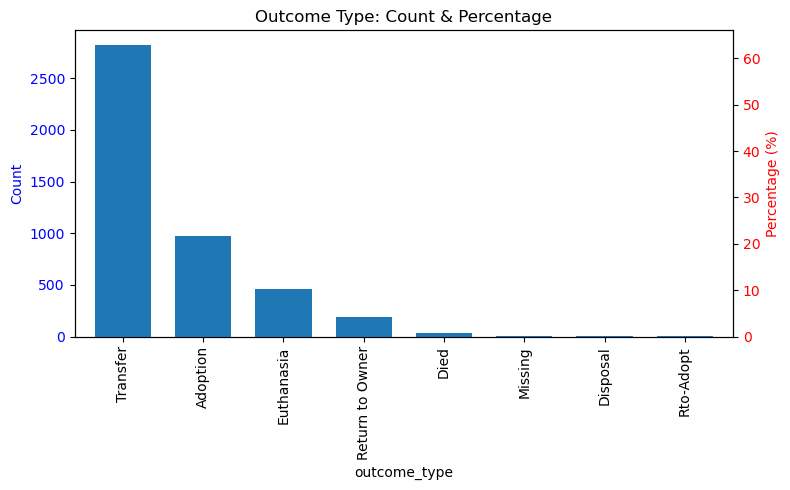

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['outcome_type'].value_counts().plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Outcome Type: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['outcome_type'].value_counts()/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The most common `outcome_type` is `Transfer` (over $60\%$ of the total).

Bar plot of the `outcome_subtype`. In the same plot both the total count and the percentage of each attribute value are present.

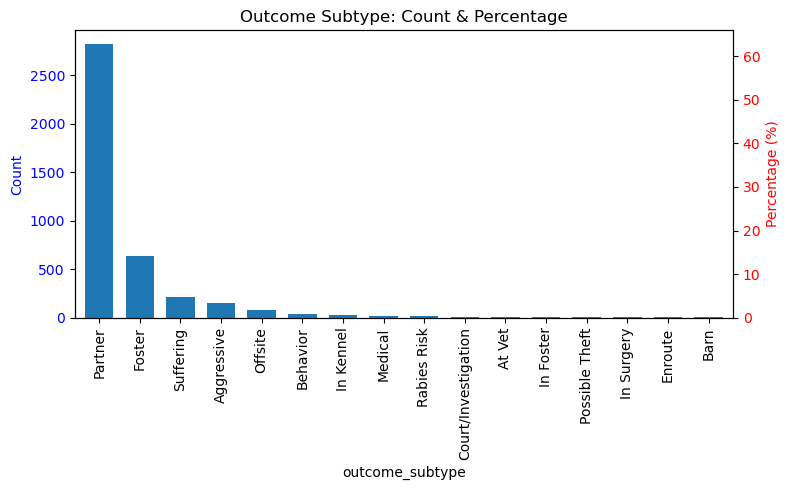

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['outcome_subtype'].value_counts().plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Outcome Subtype: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['outcome_subtype'].value_counts()/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The most common `outcome_subtype` is `Partner` (i.e. dogs are transferred to a partner dog shelter)

Let's crosstab the results for `outcome_type` and `outcome_subtype` to better see the relation between the two attributes. 

In [13]:
pd.crosstab(df['outcome_type'], df['outcome_subtype'])

outcome_subtype  Aggressive  At Vet  Barn  Behavior  Court/Investigation  \
outcome_type                                                               
Adoption                  0       0     0         0                    0   
Died                      0       6     0         0                    0   
Euthanasia              147       2     0        42                   10   
Missing                   0       0     0         0                    0   
Transfer                  0       0     1         0                    0   

outcome_subtype  Enroute  Foster  In Foster  In Kennel  In Surgery  Medical  \
outcome_type                                                                  
Adoption               0     630          0          0           0        0   
Died                   2       0          5         21           3        0   
Euthanasia             0       0          0          0           0       21   
Missing                0       0          2          1           0        0   
Transfer               0       0          0          0           0        0   

outcome_subtype  Offsite  Partner  Possible Theft  Rabies Risk  Suffering  
outcome_type                                                               
Adoption              80        0               0            0          0  
Died                   0        0               0            0          0  
Euthanasia             0        0               0           19        216  
Missing                0        0               4            0          0  
Transfer               0     2820               0            0          0

The following is the same crosstab but with percentages summing over the rows

In [14]:
pd.crosstab(df['outcome_type'], df['outcome_subtype']).div(pd.crosstab(df['outcome_type'], df['outcome_subtype']).sum(0).astype(float), axis=1)

outcome_subtype  Aggressive  At Vet  Barn  Behavior  Court/Investigation  \
outcome_type                                                               
Adoption                0.0    0.00   0.0       0.0                  0.0   
Died                    0.0    0.75   0.0       0.0                  0.0   
Euthanasia              1.0    0.25   0.0       1.0                  1.0   
Missing                 0.0    0.00   0.0       0.0                  0.0   
Transfer                0.0    0.00   1.0       0.0                  0.0   

outcome_subtype  Enroute  Foster  In Foster  In Kennel  In Surgery  Medical  \
outcome_type                                                                  
Adoption             0.0     1.0   0.000000   0.000000         0.0      0.0   
Died                 1.0     0.0   0.714286   0.954545         1.0      0.0   
Euthanasia           0.0     0.0   0.000000   0.000000         0.0      1.0   
Missing              0.0     0.0   0.285714   0.045455         0.0      0.0   
Transfer             0.0     0.0   0.000000   0.000000         0.0      0.0   

outcome_subtype  Offsite  Partner  Possible Theft  Rabies Risk  Suffering  
outcome_type                                                               
Adoption             1.0      0.0             0.0          0.0        0.0  
Died                 0.0      0.0             0.0          0.0        0.0  
Euthanasia           0.0      0.0             0.0          1.0        1.0  
Missing              0.0      0.0             1.0          0.0        0.0  
Transfer             0.0      1.0             0.0          0.0        0.0

Some interesting relations can be outlined:

1. All the dogs in `Foster` and in `Offsite` were adopted.
2. All the dogs `At Vet` died or were euthainzed; all the `Enroute` dogs died as well as the ones `In Surgery` and also the vast majority of the ones `In Foster` and `In Kennel`.
3. All the `Aggressive` dogs, with `Behavior` problems or invloved in `Court/Investigation` were euthanized; all of the `Rabies Risk` and `Suffering` dogs were euthainzed too.

The following is the same crosstab but with percentages summing over the columns

In [15]:
pd.crosstab(df['outcome_type'], df['outcome_subtype']).div(pd.crosstab(df['outcome_type'], df['outcome_subtype']).sum(1).astype(float), axis=0)

outcome_subtype  Aggressive    At Vet      Barn  Behavior  \
outcome_type                                                
Adoption           0.000000  0.000000  0.000000  0.000000   
Died               0.000000  0.162162  0.000000  0.000000   
Euthanasia         0.321663  0.004376  0.000000  0.091904   
Missing            0.000000  0.000000  0.000000  0.000000   
Transfer           0.000000  0.000000  0.000354  0.000000   

outcome_subtype  Court/Investigation   Enroute    Foster  In Foster  \
outcome_type                                                          
Adoption                    0.000000  0.000000  0.887324   0.000000   
Died                        0.000000  0.054054  0.000000   0.135135   
Euthanasia                  0.021882  0.000000  0.000000   0.000000   
Missing                     0.000000  0.000000  0.000000   0.285714   
Transfer                    0.000000  0.000000  0.000000   0.000000   

outcome_subtype  In Kennel  In Surgery   Medical   Offsite   Partner  \
outcome_type                                                           
Adoption          0.000000    0.000000  0.000000  0.112676  0.000000   
Died              0.567568    0.081081  0.000000  0.000000  0.000000   
Euthanasia        0.000000    0.000000  0.045952  0.000000  0.000000   
Missing           0.142857    0.000000  0.000000  0.000000  0.000000   
Transfer          0.000000    0.000000  0.000000  0.000000  0.999646   

outcome_subtype  Possible Theft  Rabies Risk  Suffering  
outcome_type                                             
Adoption               0.000000     0.000000   0.000000  
Died                   0.000000     0.000000   0.000000  
Euthanasia             0.000000     0.041575   0.472648  
Missing                0.571429     0.000000   0.000000  
Transfer               0.000000     0.000000   0.000000

Some others interesting relations can be outlined:

1. The majority of adopted dogs were in `Foster`.
2. Half of the dead dogs died `In Kennel`.
3. The most euthanized dogs are the `Aggressive` and the `Suffering` ones.
4. The almost totality of transfered dogs went to a `Partner` dog shelter.

Bar plot of the `Sex_upon_intake`. In the same plot both the total count and the percentage of each attribute value are present.

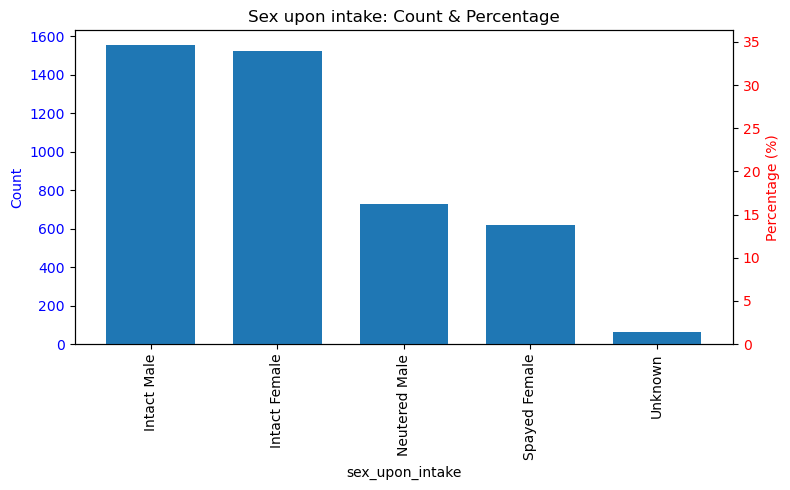

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['sex_upon_intake'].value_counts().plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Sex upon intake: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['sex_upon_intake'].value_counts()/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The majority of intaken dogs are `Intact Male` or `Intact Female`.

Bar plot of the `Sex_upon_outcome`. In the same plot both the total count and the percentage of each attribute value are present.

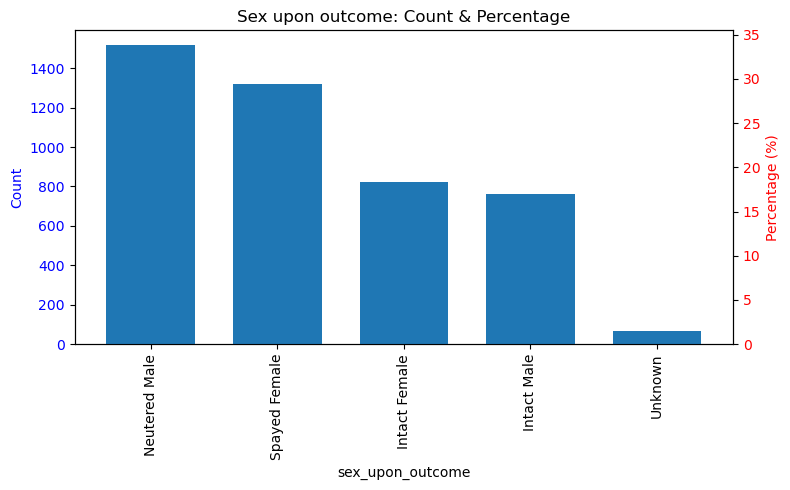

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['sex_upon_outcome'].value_counts().plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Sex upon outcome: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['sex_upon_outcome'].value_counts()/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The majority of outcoming dogs are `Neutered Male` or `Spayed Female`.

Let's crosstab the results for `Sex_upon_intake` and `Sex_upon_outcome` to better see the relation between the two attributes. 

In [18]:
pd.crosstab(df['sex_upon_intake'], df['sex_upon_outcome'])

sex_upon_outcome  Intact Female  Intact Male  Neutered Male  Spayed Female  \
sex_upon_intake                                                              
Intact Female               824            0              0            700   
Intact Male                   0          763            790              0   
Neutered Male                 0            0            726              0   
Spayed Female                 0            0              0            619   
Unknown                       0            0              0              0   

sex_upon_outcome  Unknown  
sex_upon_intake            
Intact Female           0  
Intact Male             0  
Neutered Male           0  
Spayed Female           0  
Unknown                65

The following is the same crosstab but with percentages summing over the rows

In [19]:
pd.crosstab(df['sex_upon_intake'], df['sex_upon_outcome']).div(pd.crosstab(df['sex_upon_intake'], df['sex_upon_outcome']).sum(1).astype(float), axis=0)

sex_upon_outcome  Intact Female  Intact Male  Neutered Male  Spayed Female  \
sex_upon_intake                                                              
Intact Female          0.540682     0.000000       0.000000       0.459318   
Intact Male            0.000000     0.491307       0.508693       0.000000   
Neutered Male          0.000000     0.000000       1.000000       0.000000   
Spayed Female          0.000000     0.000000       0.000000       1.000000   
Unknown                0.000000     0.000000       0.000000       0.000000   

sex_upon_outcome  Unknown  
sex_upon_intake            
Intact Female         0.0  
Intact Male           0.0  
Neutered Male         0.0  
Spayed Female         0.0  
Unknown               1.0

The following is the same crosstab but with percentages summing over the columns

In [20]:
pd.crosstab(df['sex_upon_intake'], df['sex_upon_outcome']).div(pd.crosstab(df['sex_upon_intake'], df['sex_upon_outcome']).sum(0).astype(float), axis=1)

sex_upon_outcome  Intact Female  Intact Male  Neutered Male  Spayed Female  \
sex_upon_intake                                                              
Intact Female               1.0          0.0       0.000000       0.530705   
Intact Male                 0.0          1.0       0.521108       0.000000   
Neutered Male               0.0          0.0       0.478892       0.000000   
Spayed Female               0.0          0.0       0.000000       0.469295   
Unknown                     0.0          0.0       0.000000       0.000000   

sex_upon_outcome  Unknown  
sex_upon_intake            
Intact Female         0.0  
Intact Male           0.0  
Neutered Male         0.0  
Spayed Female         0.0  
Unknown               1.0

The two cross-tabulation above basically say that half of the intact males and females upon intake were neutered/spayed upon outcome.

Let's crosstab the results for `outcome_type` and `Sex_upon_outcome` to better see the relation between the two attributes. 

In [21]:
pd.crosstab(df['outcome_type'], df['sex_upon_outcome']) # It seems that Neutered Male and Spayed Female are adopted more than the intact ones

sex_upon_outcome  Intact Female  Intact Male  Neutered Male  Spayed Female  \
outcome_type                                                                 
Adoption                     16           11            456            492   
Died                         14            7              9              3   
Disposal                      0            1              0              0   
Euthanasia                  118          126            116             88   
Missing                       0            4              2              1   
Return to Owner              22           24             78             63   
Rto-Adopt                     0            0              1              0   
Transfer                    654          590            854            672   

sex_upon_outcome  Unknown  
outcome_type               
Adoption                0  
Died                    4  
Disposal                0  
Euthanasia              9  
Missing                 0  
Return to Owner         1  
Rto-Adopt               0  
Transfer               51

Visually the cross-tabulation looks like this:

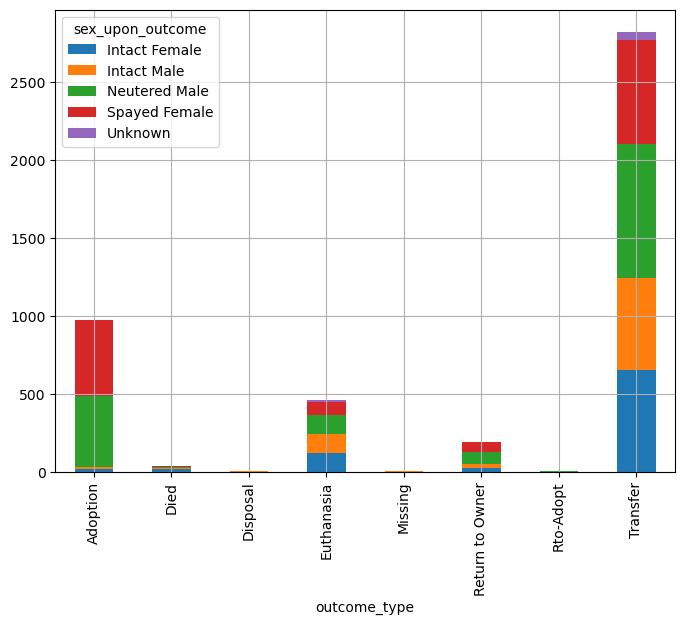

In [22]:
pd.crosstab(df['outcome_type'], df['sex_upon_outcome']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.grid()
plt.show()

From the plot above it seems that Neutered Male and Spayed Female are adopted more than the intact ones. Let's see also the various percentages:

The following is the same crosstab but with percentages summing over the rows

In [23]:
pd.crosstab(df['outcome_type'], df['sex_upon_outcome']).div(pd.crosstab(df['outcome_type'], df['sex_upon_outcome']).sum(0).astype(float), axis=1) # There is a preference on Neutered/Spayed dogs

sex_upon_outcome  Intact Female  Intact Male  Neutered Male  Spayed Female  \
outcome_type                                                                 
Adoption               0.019417     0.014417       0.300792       0.373010   
Died                   0.016990     0.009174       0.005937       0.002274   
Disposal               0.000000     0.001311       0.000000       0.000000   
Euthanasia             0.143204     0.165138       0.076517       0.066717   
Missing                0.000000     0.005242       0.001319       0.000758   
Return to Owner        0.026699     0.031455       0.051451       0.047763   
Rto-Adopt              0.000000     0.000000       0.000660       0.000000   
Transfer               0.793689     0.773263       0.563325       0.509477   

sex_upon_outcome   Unknown  
outcome_type                
Adoption          0.000000  
Died              0.061538  
Disposal          0.000000  
Euthanasia        0.138462  
Missing           0.000000  
Return to Owner   0.015385  
Rto-Adopt         0.000000  
Transfer          0.784615

The following is the same crosstab but with percentages summing over the columns

In [24]:
pd.crosstab(df['outcome_type'], df['sex_upon_outcome']).div(pd.crosstab(df['outcome_type'], df['sex_upon_outcome']).sum(1).astype(float), axis=0)

sex_upon_outcome  Intact Female  Intact Male  Neutered Male  Spayed Female  \
outcome_type                                                                 
Adoption               0.016410     0.011282       0.467692       0.504615   
Died                   0.378378     0.189189       0.243243       0.081081   
Disposal               0.000000     1.000000       0.000000       0.000000   
Euthanasia             0.258206     0.275711       0.253829       0.192560   
Missing                0.000000     0.571429       0.285714       0.142857   
Return to Owner        0.117021     0.127660       0.414894       0.335106   
Rto-Adopt              0.000000     0.000000       1.000000       0.000000   
Transfer               0.231833     0.209146       0.302730       0.238213   

sex_upon_outcome   Unknown  
outcome_type                
Adoption          0.000000  
Died              0.108108  
Disposal          0.000000  
Euthanasia        0.019694  
Missing           0.000000  
Return to Owner   0.005319  
Rto-Adopt         0.000000  
Transfer          0.018079

These two cross-tabulation show that there is a prefernce for the adoption of Neutered/Spayed dogs. Moreover males and females are adopted more or less with the same numbers so there is no preference between the two sexes.

Let's crosstab the results for `outcome_subtype` and `Sex_upon_outcome` to better see the relation between the two attributes.

In [25]:
pd.crosstab(df['outcome_subtype'], df['sex_upon_outcome'])

sex_upon_outcome     Intact Female  Intact Male  Neutered Male  Spayed Female  \
outcome_subtype                                                                 
Aggressive                      22           44             48             33   
At Vet                           1            4              3              0   
Barn                             1            0              0              0   
Behavior                         9            9             17              7   
Court/Investigation              3            5              0              2   
Enroute                          0            1              0              0   
Foster                          10           10            298            312   
In Foster                        2            2              2              0   
In Kennel                        9            4              4              3   
In Surgery                       2            0              1              0   
Medical                          7            4              5              4   
Offsite                          0            0             39             41   
Partner                        653          590            854            672   
Possible Theft                   0            2              1              1   
Rabies Risk                      1            5              9              4   
Suffering                       76           57             37             38   

sex_upon_outcome     Unknown  
outcome_subtype               
Aggressive                 0  
At Vet                     0  
Barn                       0  
Behavior                   0  
Court/Investigation        0  
Enroute                    1  
Foster                     0  
In Foster                  1  
In Kennel                  2  
In Surgery                 0  
Medical                    1  
Offsite                    0  
Partner                   51  
Possible Theft             0  
Rabies Risk                0  
Suffering                  8

Visually the cross-tabulation looks like this:

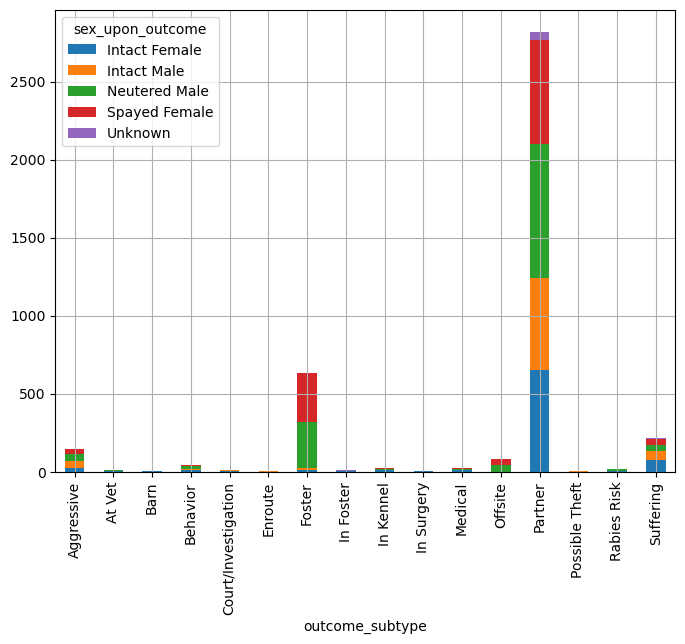

In [26]:
pd.crosstab(df['outcome_subtype'], df['sex_upon_outcome']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.grid()
plt.show()

The plot above can be better understood by looking at the actual percentages:

The following is the same crosstab but with percentages summing over the rows

In [27]:
pd.crosstab(df['outcome_subtype'], df['sex_upon_outcome']).div(pd.crosstab(df['outcome_subtype'], df['sex_upon_outcome']).sum(0).astype(float), axis=1)

sex_upon_outcome     Intact Female  Intact Male  Neutered Male  Spayed Female  \
outcome_subtype                                                                 
Aggressive                0.027638     0.059701       0.036419       0.029543   
At Vet                    0.001256     0.005427       0.002276       0.000000   
Barn                      0.001256     0.000000       0.000000       0.000000   
Behavior                  0.011307     0.012212       0.012898       0.006267   
Court/Investigation       0.003769     0.006784       0.000000       0.001791   
Enroute                   0.000000     0.001357       0.000000       0.000000   
Foster                    0.012563     0.013569       0.226100       0.279320   
In Foster                 0.002513     0.002714       0.001517       0.000000   
In Kennel                 0.011307     0.005427       0.003035       0.002686   
In Surgery                0.002513     0.000000       0.000759       0.000000   
Medical                   0.008794     0.005427       0.003794       0.003581   
Offsite                   0.000000     0.000000       0.029590       0.036705   
Partner                   0.820352     0.800543       0.647951       0.601611   
Possible Theft            0.000000     0.002714       0.000759       0.000895   
Rabies Risk               0.001256     0.006784       0.006829       0.003581   
Suffering                 0.095477     0.077341       0.028073       0.034020   

sex_upon_outcome      Unknown  
outcome_subtype                
Aggressive           0.000000  
At Vet               0.000000  
Barn                 0.000000  
Behavior             0.000000  
Court/Investigation  0.000000  
Enroute              0.015625  
Foster               0.000000  
In Foster            0.015625  
In Kennel            0.031250  
In Surgery           0.000000  
Medical              0.015625  
Offsite              0.000000  
Partner              0.796875  
Possible Theft       0.000000  
Rabies Risk          0.000000  
Suffering            0.125000

The following is the same crosstab but with percentages summing over the columns

In [28]:
pd.crosstab(df['outcome_subtype'], df['sex_upon_outcome']).div(pd.crosstab(df['outcome_subtype'], df['sex_upon_outcome']).sum(1).astype(float), axis=0)

sex_upon_outcome     Intact Female  Intact Male  Neutered Male  Spayed Female  \
outcome_subtype                                                                 
Aggressive                0.149660     0.299320       0.326531       0.224490   
At Vet                    0.125000     0.500000       0.375000       0.000000   
Barn                      1.000000     0.000000       0.000000       0.000000   
Behavior                  0.214286     0.214286       0.404762       0.166667   
Court/Investigation       0.300000     0.500000       0.000000       0.200000   
Enroute                   0.000000     0.500000       0.000000       0.000000   
Foster                    0.015873     0.015873       0.473016       0.495238   
In Foster                 0.285714     0.285714       0.285714       0.000000   
In Kennel                 0.409091     0.181818       0.181818       0.136364   
In Surgery                0.666667     0.000000       0.333333       0.000000   
Medical                   0.333333     0.190476       0.238095       0.190476   
Offsite                   0.000000     0.000000       0.487500       0.512500   
Partner                   0.231560     0.209220       0.302837       0.238298   
Possible Theft            0.000000     0.500000       0.250000       0.250000   
Rabies Risk               0.052632     0.263158       0.473684       0.210526   
Suffering                 0.351852     0.263889       0.171296       0.175926   

sex_upon_outcome      Unknown  
outcome_subtype                
Aggressive           0.000000  
At Vet               0.000000  
Barn                 0.000000  
Behavior             0.000000  
Court/Investigation  0.000000  
Enroute              0.500000  
Foster               0.000000  
In Foster            0.142857  
In Kennel            0.090909  
In Surgery           0.000000  
Medical              0.047619  
Offsite              0.000000  
Partner              0.018085  
Possible Theft       0.000000  
Rabies Risk          0.000000  
Suffering            0.037037

From the two cross-tabulation above we see that male dogs tend to be more aggressive/with behaviour problems than the female ones.

Bar plot of the `intake_condition`. In the same plot both the total count and the percentage of each attribute value are present.

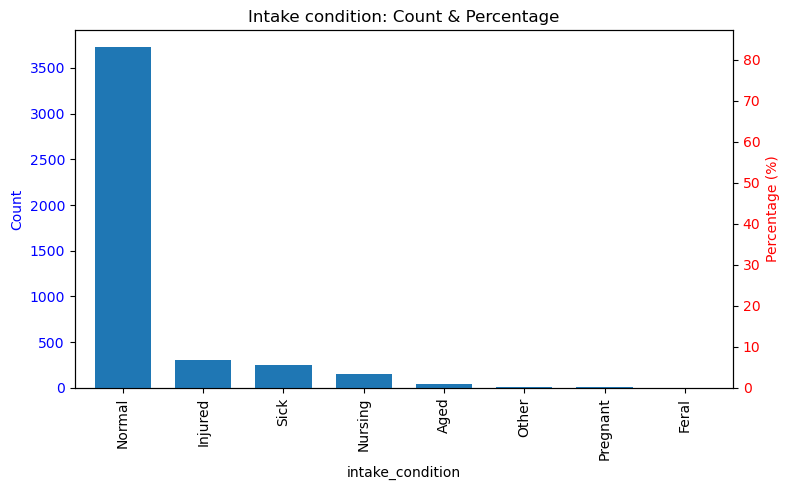

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['intake_condition'].value_counts().plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Intake condition: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['intake_condition'].value_counts()/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The vast majority of intaken dogs are `Normal`.

Let's crosstab the results for `intake_condition` and `outcome_type` to better see the relation between the two attributes. 

In [30]:
pd.crosstab(df['intake_condition'], df['outcome_type'])

outcome_type      Adoption  Died  Disposal  Euthanasia  Missing  \
intake_condition                                                  
Aged                     5     0         0          18        0   
Feral                    0     0         0           0        0   
Injured                 52     8         0         101        1   
Normal                 832    21         1         269        4   
Nursing                 55     5         0           3        1   
Other                    2     0         0           1        0   
Pregnant                 3     0         0           0        0   
Sick                    26     3         0          65        1   

outcome_type      Return to Owner  Rto-Adopt  Transfer  
intake_condition                                        
Aged                            1          0        15  
Feral                           0          0         3  
Injured                         5          0       133  
Normal                        180          1      2417  
Nursing                         1          0        89  
Other                           1          0         8  
Pregnant                        0          0         3  
Sick                            0          0       153

The cross-tabulation visually looks like this:

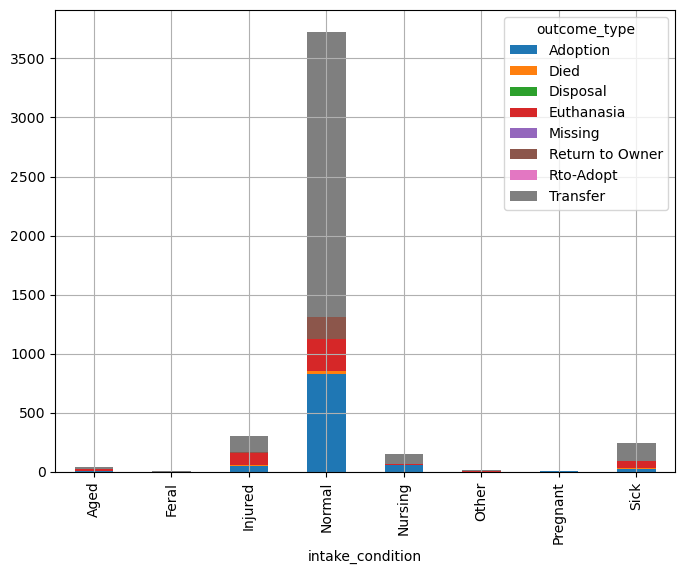

In [31]:
pd.crosstab(df['intake_condition'], df['outcome_type']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.grid()
plt.show()

Let's look also at the percentages to have a more quantitative result:

The following is the same crosstab but with percentages summing over the rows

In [32]:
pd.crosstab(df['intake_condition'], df['outcome_type']).div(pd.crosstab(df['intake_condition'], df['outcome_type']).sum(0), axis = 1)

outcome_type      Adoption      Died  Disposal  Euthanasia   Missing  \
intake_condition                                                       
Aged              0.005128  0.000000       0.0    0.039387  0.000000   
Feral             0.000000  0.000000       0.0    0.000000  0.000000   
Injured           0.053333  0.216216       0.0    0.221007  0.142857   
Normal            0.853333  0.567568       1.0    0.588621  0.571429   
Nursing           0.056410  0.135135       0.0    0.006565  0.142857   
Other             0.002051  0.000000       0.0    0.002188  0.000000   
Pregnant          0.003077  0.000000       0.0    0.000000  0.000000   
Sick              0.026667  0.081081       0.0    0.142232  0.142857   

outcome_type      Return to Owner  Rto-Adopt  Transfer  
intake_condition                                        
Aged                     0.005319        0.0  0.005317  
Feral                    0.000000        0.0  0.001063  
Injured                  0.026596        0.0  0.047146  
Normal                   0.957447        1.0  0.856788  
Nursing                  0.005319        0.0  0.031549  
Other                    0.005319        0.0  0.002836  
Pregnant                 0.000000        0.0  0.001063  
Sick                     0.000000        0.0  0.054236

From the crosstab above we can outline some relations:

1. The vast majority of adopted dogs were `Normal` upon intake.
2. Half of the dead dogs were `Normal` upon intake as well as half of the euthanized.
3. The totality of `Disposal` were `Normal` upon intake.

The following is the same crosstab but with percentages summing over the columns

In [33]:
pd.crosstab(df['intake_condition'], df['outcome_type']).div(pd.crosstab(df['intake_condition'], df['outcome_type']).sum(1), axis = 0)

outcome_type      Adoption      Died  Disposal  Euthanasia   Missing  \
intake_condition                                                       
Aged              0.128205  0.000000  0.000000    0.461538  0.000000   
Feral             0.000000  0.000000  0.000000    0.000000  0.000000   
Injured           0.173333  0.026667  0.000000    0.336667  0.003333   
Normal            0.223356  0.005638  0.000268    0.072215  0.001074   
Nursing           0.357143  0.032468  0.000000    0.019481  0.006494   
Other             0.166667  0.000000  0.000000    0.083333  0.000000   
Pregnant          0.500000  0.000000  0.000000    0.000000  0.000000   
Sick              0.104839  0.012097  0.000000    0.262097  0.004032   

outcome_type      Return to Owner  Rto-Adopt  Transfer  
intake_condition                                        
Aged                     0.025641   0.000000  0.384615  
Feral                    0.000000   0.000000  1.000000  
Injured                  0.016667   0.000000  0.443333  
Normal                   0.048322   0.000268  0.648859  
Nursing                  0.006494   0.000000  0.577922  
Other                    0.083333   0.000000  0.666667  
Pregnant                 0.000000   0.000000  0.500000  
Sick                     0.000000   0.000000  0.616935

From the crosstab above some interesting relations can be outlined:

1. Half of the `Aged` dogs were euthanized and the remaining were transfered or adopted.
2. All the `Feral` dogs where transfered
3. One third of `Injured` dogs were euthanized.
4. The vast majority of `Normal` dogs were transfered or adopted; the same for `Nursing` dogs.
5. Half of `Pregnant` dogs were adopted and the other half transfered.
6. The majority of `Sick` dogs were transfered.

Bar plot of the `intake_type`. In the same plot both the total count and the percentage of each attribute value are present.

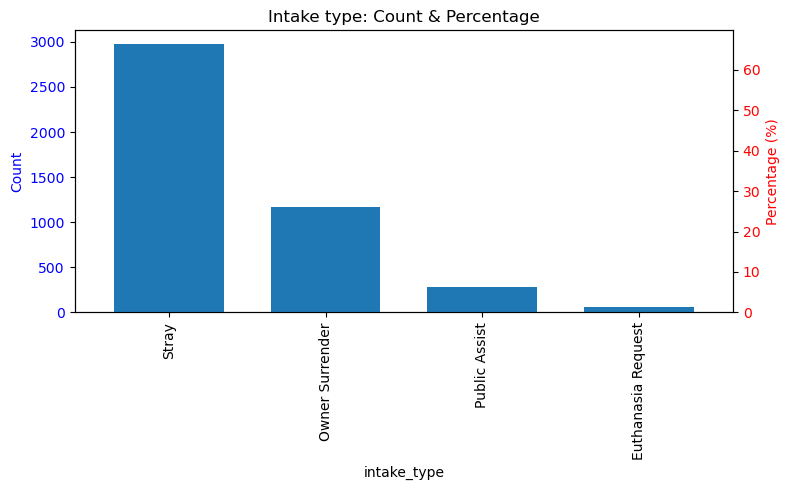

In [34]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['intake_type'].value_counts().plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Intake type: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['intake_type'].value_counts()/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The majority of dogs were `Stray` upon intake. The second most frequent type of `intake_type` is `Owner Surrender`.

Let's crosstab the results for `intake_condition` and `intake_type` to better see the relation between the two attributes. 

In [35]:
pd.crosstab(df['intake_condition'], df['intake_type'])

intake_type       Euthanasia Request  Owner Surrender  Public Assist  Stray
intake_condition                                                           
Aged                              14                9              3     13
Feral                              0                0              0      3
Injured                            2               36             15    247
Normal                            20             1009            245   2451
Nursing                            0               33              2    119
Other                              0                2              1      9
Pregnant                           0                3              0      3
Sick                              29               72             13    134

The cross-tabulation visually looks like this:

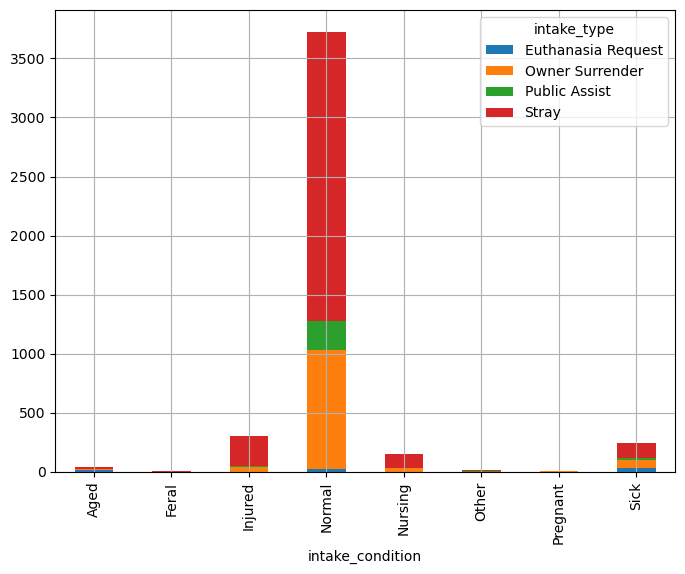

In [36]:
pd.crosstab(df['intake_condition'], df['intake_type']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.grid()
plt.show()

As always let's have a look also at the percentages:

The following is the same crosstab but with percentages summing over the rows

In [37]:
pd.crosstab(df['intake_condition'], df['intake_type']).div(pd.crosstab(df['intake_condition'], df['intake_type']).sum(0), axis = 1)

intake_type       Euthanasia Request  Owner Surrender  Public Assist     Stray
intake_condition                                                              
Aged                        0.215385         0.007732       0.010753  0.004364
Feral                       0.000000         0.000000       0.000000  0.001007
Injured                     0.030769         0.030928       0.053763  0.082914
Normal                      0.307692         0.866838       0.878136  0.822759
Nursing                     0.000000         0.028351       0.007168  0.039946
Other                       0.000000         0.001718       0.003584  0.003021
Pregnant                    0.000000         0.002577       0.000000  0.001007
Sick                        0.446154         0.061856       0.046595  0.044982

From the above crosstab some relations can be outlined:

1. Among all the dogs for which there was an `Euthanasia Request`, half of them were `Sick` and the other half either `Aged` or `Normal`.
2. The vast majority dogs belonging to `Owner Surrender` as well as to `Public Assist` and `Stray` were `Normal`.

The following is the same crosstab but with percentages summing over the columns

In [38]:
pd.crosstab(df['intake_condition'], df['intake_type']).div(pd.crosstab(df['intake_condition'], df['intake_type']).sum(1), axis = 0)

intake_type       Euthanasia Request  Owner Surrender  Public Assist     Stray
intake_condition                                                              
Aged                        0.358974         0.230769       0.076923  0.333333
Feral                       0.000000         0.000000       0.000000  1.000000
Injured                     0.006667         0.120000       0.050000  0.823333
Normal                      0.005369         0.270872       0.065772  0.657987
Nursing                     0.000000         0.214286       0.012987  0.772727
Other                       0.000000         0.166667       0.083333  0.750000
Pregnant                    0.000000         0.500000       0.000000  0.500000
Sick                        0.116935         0.290323       0.052419  0.540323

From the above crosstab the following relations can be found:

1. One third of `Aged` dogs belong to `Euthanasia Request`, another third to `Stray` and the remaining to `Owner Surrender`.
2. All the `Feral` dogs were `Stray` as well as the vast majority of the `Injured`.
3. Two thirds of `Normal` dogs were `Stray` and the remaining third belongs to `Owner Surrender`.
4. Three fourths of `Nursing` dogs were `Stray` and the remaining fourth belongs to `Owner Surrender`. The same proportions hold for the cathegory `Other`.
5. Half of `Pregnant` dogs were `Stray` and the other half belongs to `Owner Surrender`.
6. Half of `Sick` dogs were `Stray` and one third belongs to `Owner Surrender`.

Bar plot of the `Breed`. In the same plot both the total count and the percentage of each attribute value are present.

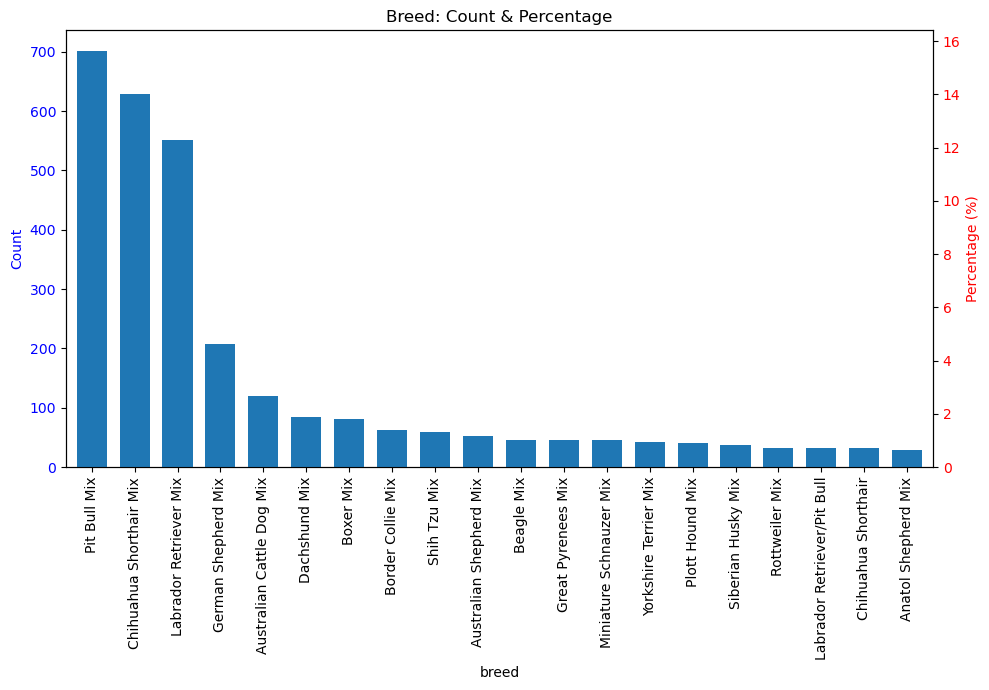

In [39]:
fig, ax = plt.subplots(figsize=(10, 7))  

df['breed'].value_counts()[:20].plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Breed: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['breed'].value_counts()[:20]/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The three top breeds are `Pit Bull Mix`, `Chihuahua Shorthair Mix` and `Labrador Retriever Mix`. Only the top 20 breeds are plotted for practical reasons (there are more then 500 breeds in total!).

Here we plot the cumulative distribution of the number of breeds:

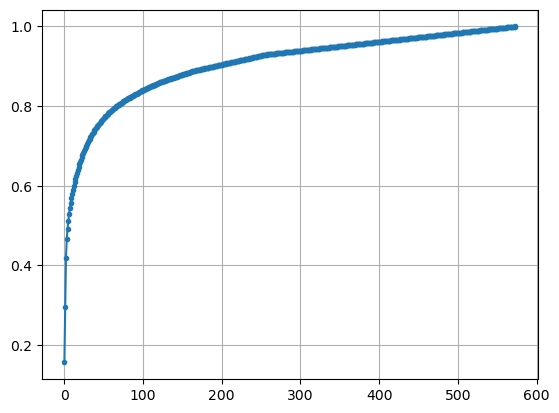

In [40]:
plt.plot(np.arange(0, len(df['breed'].value_counts()/len(df) * 100)), np.cumsum(df['breed'].value_counts()/len(df) * 100)/100, marker = '.')
plt.grid()
plt.show()

In [41]:
print('top 3 breeds: ',np.cumsum(df['breed'].value_counts()/len(df) * 100).iloc[3])
print('top 6 breeds: ',np.cumsum(df['breed'].value_counts()/len(df) * 100).iloc[6])

top 3 breeds:  46.55671941163361
top 6 breeds:  52.93068865611767


From the above calculation we deduce that by considering only the first 3 most common breeds we basically cover the $47\%$ of the total number of dogs while by considering the 6 most common breeds we cover $53\%$ of the total. Therefore it can be a good idea to add a column to the DataFrame called `top6_breeds` that take the value `True` only when the dog belongs to one of the 6 top breeds.

In [42]:
top_breeds_l = []

for i in range(len(df)):
    if df['breed'][i] in df['breed'].value_counts()[:6].keys():
        top_breeds_l.append(True)
    else:
        top_breeds_l.append(False)

df['top6_breeds'] = top_breeds_l

In [43]:
df_top6_breeds = df[df['top6_breeds'] == True]

Let's crosstab the results for `breed` and `outcome_type` to better see the relation between the two attributes. We are restricting only to the top 6 breeds.

In [44]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_type'])

outcome_type               Adoption  Died  Disposal  Euthanasia  Missing  \
breed                                                                      
Australian Cattle Dog Mix        33     2         0          12        0   
Chihuahua Shorthair Mix         129     3         1          54        1   
Dachshund Mix                    16     0         0           2        0   
German Shepherd Mix              52     0         0          20        0   
Labrador Retriever Mix          149     5         0          38        0   
Pit Bull Mix                    100     5         0         141        5   

outcome_type               Return to Owner  Transfer  
breed                                                 
Australian Cattle Dog Mix                4        69  
Chihuahua Shorthair Mix                 15       425  
Dachshund Mix                            3        64  
German Shepherd Mix                      9       127  
Labrador Retriever Mix                  20       340  
Pit Bull Mix                            31       419

This is how the cross-tabulation looks like:

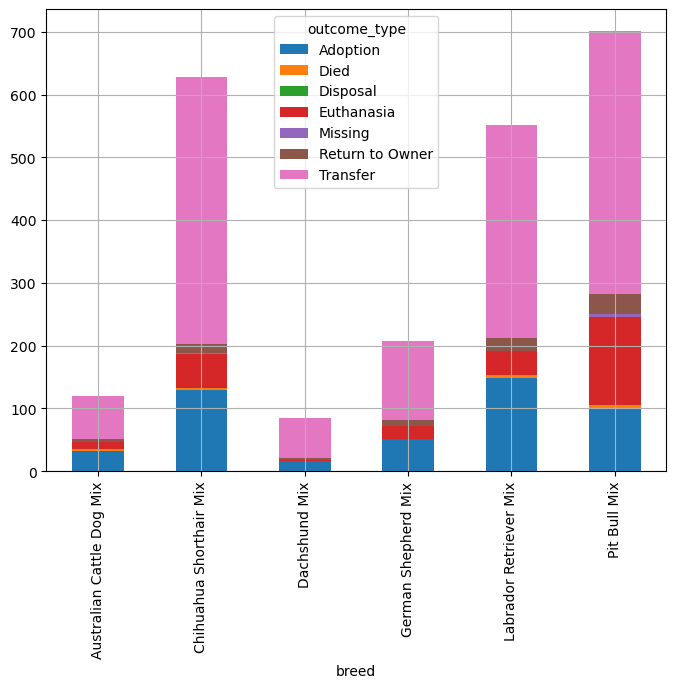

In [45]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_type']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.grid()
plt.show()

The plot above can be better understood by looking at the actual percentages:

The following is the same crosstab but with percentages summing over the rows

In [46]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_type']).div(pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_type']).sum(0), axis = 1)

outcome_type               Adoption      Died  Disposal  Euthanasia   Missing  \
breed                                                                           
Australian Cattle Dog Mix  0.068894  0.133333       0.0    0.044944  0.000000   
Chihuahua Shorthair Mix    0.269311  0.200000       1.0    0.202247  0.166667   
Dachshund Mix              0.033403  0.000000       0.0    0.007491  0.000000   
German Shepherd Mix        0.108559  0.000000       0.0    0.074906  0.000000   
Labrador Retriever Mix     0.311065  0.333333       0.0    0.142322  0.000000   
Pit Bull Mix               0.208768  0.333333       0.0    0.528090  0.833333   

outcome_type               Return to Owner  Transfer  
breed                                                 
Australian Cattle Dog Mix         0.048780  0.047784  
Chihuahua Shorthair Mix           0.182927  0.294321  
Dachshund Mix                     0.036585  0.044321  
German Shepherd Mix               0.109756  0.087950  
Labrador Retriever Mix            0.243902  0.235457  
Pit Bull Mix                      0.378049  0.290166

From the above crosstab some relations can be outlined:

1. The top adopted breed is `Labrador Retriever Mix`.
2. One third of `Died` dogs are `Labrador Retriever Mix` and another third are `Pit Bull Mix`.
3. All the `Disposal` dogs are `Chihuahua Shorthair Mix`.
4. Half of the euthanized dogs are `Pit Bull Mix`.
5. The vast majority of `Missing` dogs are `Pit Bull Mix`.

The following is the same crosstab but with percentages summing over the columns

In [47]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_type']).div(pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_type']).sum(1), axis = 0)

outcome_type               Adoption      Died  Disposal  Euthanasia   Missing  \
breed                                                                           
Australian Cattle Dog Mix  0.275000  0.016667  0.000000    0.100000  0.000000   
Chihuahua Shorthair Mix    0.205414  0.004777  0.001592    0.085987  0.001592   
Dachshund Mix              0.188235  0.000000  0.000000    0.023529  0.000000   
German Shepherd Mix        0.250000  0.000000  0.000000    0.096154  0.000000   
Labrador Retriever Mix     0.269928  0.009058  0.000000    0.068841  0.000000   
Pit Bull Mix               0.142653  0.007133  0.000000    0.201141  0.007133   

outcome_type               Return to Owner  Transfer  
breed                                                 
Australian Cattle Dog Mix         0.033333  0.575000  
Chihuahua Shorthair Mix           0.023885  0.676752  
Dachshund Mix                     0.035294  0.752941  
German Shepherd Mix               0.043269  0.610577  
Labrador Retriever Mix            0.036232  0.615942  
Pit Bull Mix                      0.044223  0.597718

From the crosstab above we deduce that the vast majority of the top 6 breeds are either adopted or transferred.

The following is a bar plot of the most adopted breeds. This result answer the question: 'Do specific breeds have an higher chance of being adopted?'

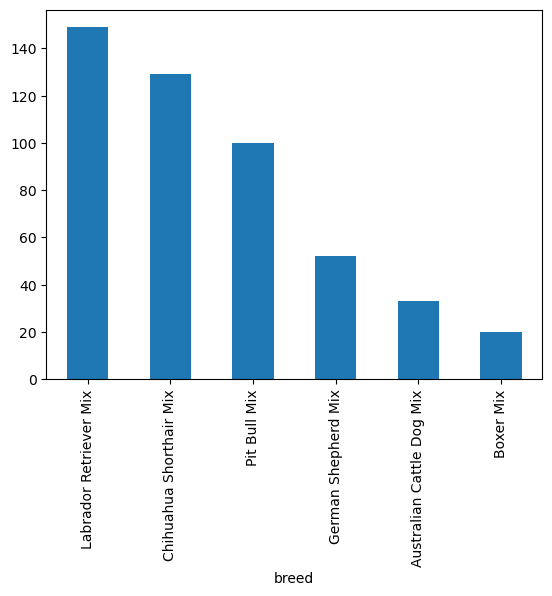

In [48]:
df[df['outcome_type'] == 'Adoption']['breed'].value_counts()[:6].plot(kind = 'bar')
plt.show()

`Labrador Retiever Mix`, `Chihuahua Shorthair Mix` and `Pit Bll Mix` are the top $3$ most adopted breeds.

While the following is a bar plot of the most euthanized breeds. This result answer the question: 'Do specific breeds have an higher chance of being euthanized?'

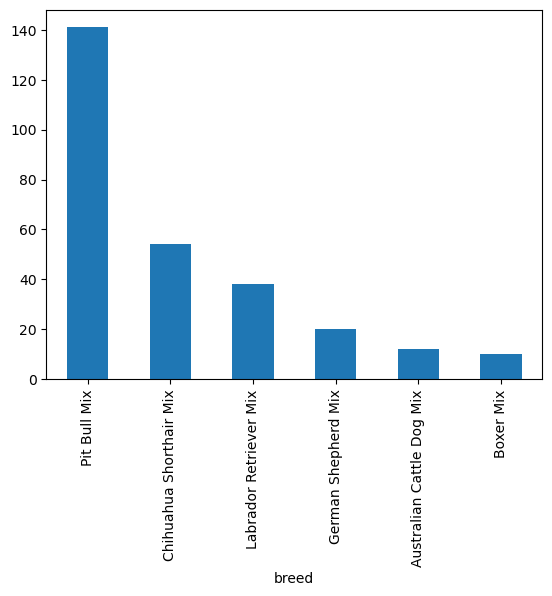

In [49]:
df[df['outcome_type'] == 'Euthanasia']['breed'].value_counts()[:6].plot(kind = 'bar')
plt.show()

`Pit Bll Mix`, `Chihuahua Shorthair Mix` anf `Labrador Retiever Mix` are the top $3$ most euthanized breeds.

Be careful that both most adopted and most euthaized breeds are also the most numerous breeds in the shelter so these results don't tell us much about the breeds.

The following bar plot shows the top breeds that have been euthanized and that were aggressive

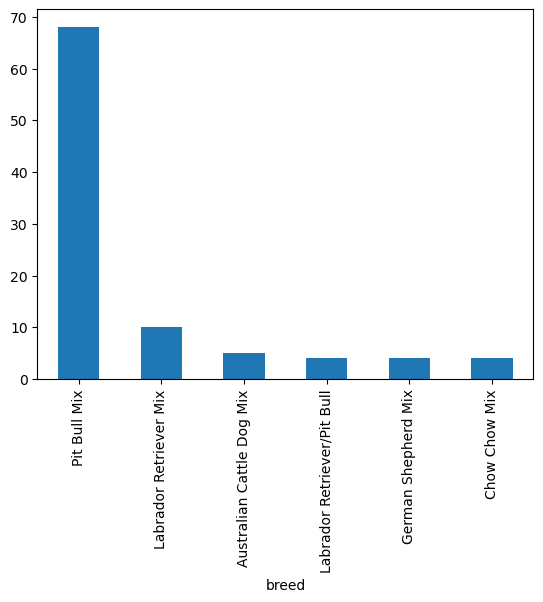

In [50]:
df[(df['outcome_type'] == 'Euthanasia') & (df['outcome_subtype'] == 'Aggressive')]['breed'].value_counts()[:6].plot(kind = 'bar')
plt.show()

They are mostly `Pit Bull Mix`.

Let's crosstab the results for `breed` and `outcome_subtype` to better see the relation between the two attributes. We are restricting only to the top 6 breeds.

In [51]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_subtype'])

outcome_subtype            Aggressive  At Vet  Barn  Behavior  \
breed                                                           
Australian Cattle Dog Mix           5       0     0         2   
Chihuahua Shorthair Mix             0       1     0         0   
Dachshund Mix                       1       0     1         0   
German Shepherd Mix                 4       0     0         0   
Labrador Retriever Mix             10       1     0         2   
Pit Bull Mix                       68       2     0        23   

outcome_subtype            Court/Investigation  Foster  In Foster  In Kennel  \
breed                                                                          
Australian Cattle Dog Mix                    1      31          0          1   
Chihuahua Shorthair Mix                      0      75          2          2   
Dachshund Mix                                0       8          0          0   
German Shepherd Mix                          0      36          0          0   
Labrador Retriever Mix                       1     108          0          3   
Pit Bull Mix                                 4      65          1          4   

outcome_subtype            In Surgery  Medical  Offsite  Partner  \
breed                                                              
Australian Cattle Dog Mix           1        1        0       69   
Chihuahua Shorthair Mix             0        3       24      425   
Dachshund Mix                       0        0        1       63   
German Shepherd Mix                 0        1        3      127   
Labrador Retriever Mix              1        1       13      340   
Pit Bull Mix                        0        4        4      419   

outcome_subtype            Possible Theft  Rabies Risk  Suffering  
breed                                                              
Australian Cattle Dog Mix               0            0          3  
Chihuahua Shorthair Mix                 0            1         49  
Dachshund Mix                           0            0          1  
German Shepherd Mix                     0            0         15  
Labrador Retriever Mix                  0            4         20  
Pit Bull Mix                            4            5         36

The following is how the cross-tabulation looks like:

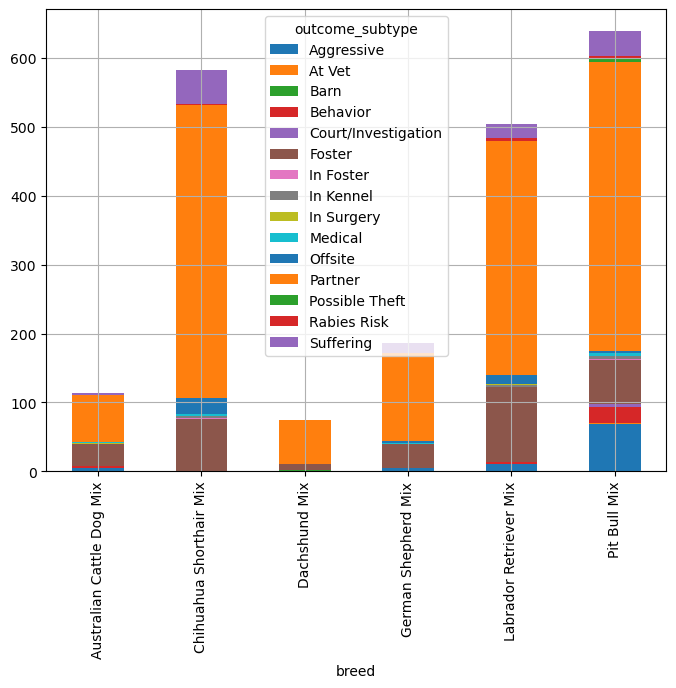

In [52]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_subtype']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.grid()
plt.show()

The plot above can be better understood by looking at the actual percentages:

The following is the same crosstab but with percentages summing over the rows

In [53]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_subtype']).div(pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_subtype']).sum(0), axis = 1)

outcome_subtype            Aggressive  At Vet  Barn  Behavior  \
breed                                                           
Australian Cattle Dog Mix    0.056818    0.00   0.0  0.074074   
Chihuahua Shorthair Mix      0.000000    0.25   0.0  0.000000   
Dachshund Mix                0.011364    0.00   1.0  0.000000   
German Shepherd Mix          0.045455    0.00   0.0  0.000000   
Labrador Retriever Mix       0.113636    0.25   0.0  0.074074   
Pit Bull Mix                 0.772727    0.50   0.0  0.851852   

outcome_subtype            Court/Investigation    Foster  In Foster  \
breed                                                                 
Australian Cattle Dog Mix             0.166667  0.095975   0.000000   
Chihuahua Shorthair Mix               0.000000  0.232198   0.666667   
Dachshund Mix                         0.000000  0.024768   0.000000   
German Shepherd Mix                   0.000000  0.111455   0.000000   
Labrador Retriever Mix                0.166667  0.334365   0.000000   
Pit Bull Mix                          0.666667  0.201238   0.333333   

outcome_subtype            In Kennel  In Surgery  Medical   Offsite   Partner  \
breed                                                                           
Australian Cattle Dog Mix        0.1         0.5      0.1  0.000000  0.047817   
Chihuahua Shorthair Mix          0.2         0.0      0.3  0.533333  0.294525   
Dachshund Mix                    0.0         0.0      0.0  0.022222  0.043659   
German Shepherd Mix              0.0         0.0      0.1  0.066667  0.088011   
Labrador Retriever Mix           0.3         0.5      0.1  0.288889  0.235620   
Pit Bull Mix                     0.4         0.0      0.4  0.088889  0.290367   

outcome_subtype            Possible Theft  Rabies Risk  Suffering  
breed                                                              
Australian Cattle Dog Mix             0.0          0.0   0.024194  
Chihuahua Shorthair Mix               0.0          0.1   0.395161  
Dachshund Mix                         0.0          0.0   0.008065  
German Shepherd Mix                   0.0          0.0   0.120968  
Labrador Retriever Mix                0.0          0.4   0.161290  
Pit Bull Mix                          1.0          0.5   0.290323

From the above crosstab we outline the following relations:

1. As we have seen the vast majority of `Aggressive` dogs are `Pit Bull Mix`. The same holds for the categories `Behavior` and `Court/Investigation`.
2. Among top 6 breeds $50%$ of the `At Vet` dogs are `Pit Bull Mix`.
3. Half of the dogs `In Surgery` are `Australian Cattle Dog Mix` and the other half are `Labrador Retriever Mix`.
4. Half of the dogs with `Rabies Risk` are `Pit Bull Mix` and the other half are `Labrador Retriever Mix`.

The following is the same crosstab but with percentages summing over the columns

In [54]:
pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_subtype']).div(pd.crosstab(df_top6_breeds['breed'], df_top6_breeds['outcome_subtype']).sum(1), axis = 0)

outcome_subtype            Aggressive    At Vet      Barn  Behavior  \
breed                                                                 
Australian Cattle Dog Mix    0.043860  0.000000  0.000000  0.017544   
Chihuahua Shorthair Mix      0.000000  0.001718  0.000000  0.000000   
Dachshund Mix                0.013333  0.000000  0.013333  0.000000   
German Shepherd Mix          0.021505  0.000000  0.000000  0.000000   
Labrador Retriever Mix       0.019841  0.001984  0.000000  0.003968   
Pit Bull Mix                 0.106416  0.003130  0.000000  0.035994   

outcome_subtype            Court/Investigation    Foster  In Foster  \
breed                                                                 
Australian Cattle Dog Mix             0.008772  0.271930   0.000000   
Chihuahua Shorthair Mix               0.000000  0.128866   0.003436   
Dachshund Mix                         0.000000  0.106667   0.000000   
German Shepherd Mix                   0.000000  0.193548   0.000000   
Labrador Retriever Mix                0.001984  0.214286   0.000000   
Pit Bull Mix                          0.006260  0.101721   0.001565   

outcome_subtype            In Kennel  In Surgery   Medical   Offsite  \
breed                                                                  
Australian Cattle Dog Mix   0.008772    0.008772  0.008772  0.000000   
Chihuahua Shorthair Mix     0.003436    0.000000  0.005155  0.041237   
Dachshund Mix               0.000000    0.000000  0.000000  0.013333   
German Shepherd Mix         0.000000    0.000000  0.005376  0.016129   
Labrador Retriever Mix      0.005952    0.001984  0.001984  0.025794   
Pit Bull Mix                0.006260    0.000000  0.006260  0.006260   

outcome_subtype             Partner  Possible Theft  Rabies Risk  Suffering  
breed                                                                        
Australian Cattle Dog Mix  0.605263         0.00000     0.000000   0.026316  
Chihuahua Shorthair Mix    0.730241         0.00000     0.001718   0.084192  
Dachshund Mix              0.840000         0.00000     0.000000   0.013333  
German Shepherd Mix        0.682796         0.00000     0.000000   0.080645  
Labrador Retriever Mix     0.674603         0.00000     0.007937   0.039683  
Pit Bull Mix               0.655712         0.00626     0.007825   0.056338

From the crosstab above we deduce that for each of the top 6 breed the most frequent `outcome_subtype` is `Partner`.

From the bar chart above with the top 20 most frequent breed, we can identify 3 main categories of dog breed: Pure (e.g. Chihuahua Shorthair), Hybrid with the breed of both parents known (e.g. Labrador Retriver/Pitbull) and Hybrid with the breed of only one of the parents known (e.g. Pit Bull Mix). It can be useful to add a column to the DataFrame that distinguishes these three categories

In [55]:
breed_type = []

for i in range(len(df)):
    if ('/' in df['breed'][i]):
        breed_type.append('hybrid')
    elif ('Mix' in df['breed'][i]):
        breed_type.append('mix')
    else:
        breed_type.append('pure')
        
df['breed_type']= breed_type

Bar plot of the `breed_type`. In the same plot both the total count and the percentage of each attribute value are present.

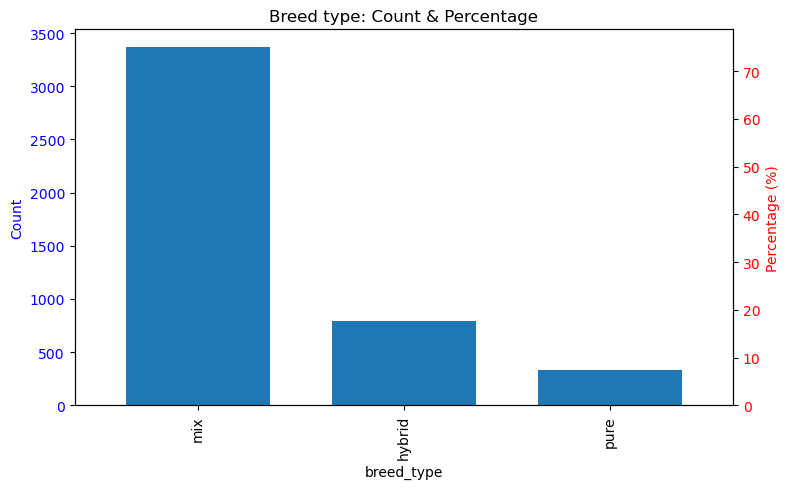

In [56]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['breed_type'].value_counts().plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Breed type: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['breed_type'].value_counts()/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The vast majority of dogs in the shelter belong to the `mix` category.

Let's crosstab the results for `breed_type` and `outcome_type` to better see the relation between the two attributes.

In [57]:
pd.crosstab(df['breed_type'],df['outcome_type'])

outcome_type  Adoption  Died  Disposal  Euthanasia  Missing  Return to Owner  \
breed_type                                                                     
hybrid             201     8         0          66        1               22   
mix                722    23         1         357        6              149   
pure                52     6         0          34        0               17   

outcome_type  Rto-Adopt  Transfer  
breed_type                         
hybrid                1       491  
mix                   0      2109  
pure                  0       221

Visually the crosstab looks like this:

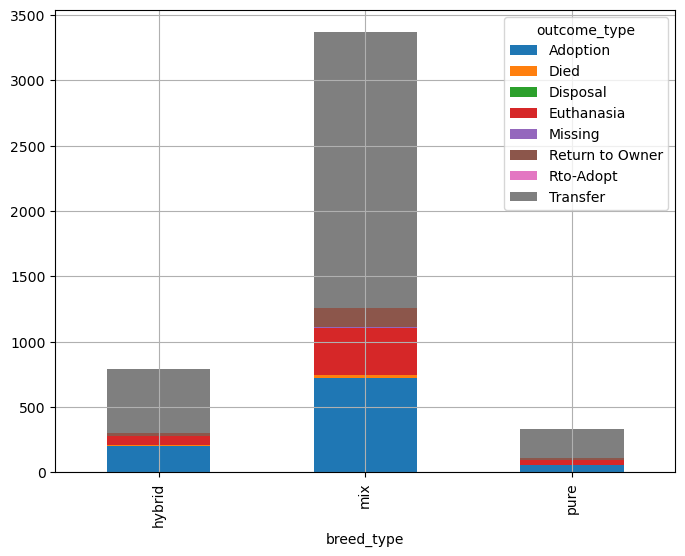

In [58]:
pd.crosstab(df['breed_type'], df['outcome_type']).plot(kind='bar', stacked=True, figsize=(8, 6))
plt.grid()
plt.show()

The plot above can be better understood by looking at the actual percentages:

The following is the same crosstab but with percentages summing over the columns

In [59]:
pd.crosstab(df['breed_type'],df['outcome_type']).div(pd.crosstab(df['breed_type'],df['outcome_type']).sum(1), axis = 0)

outcome_type  Adoption      Died  Disposal  Euthanasia   Missing  \
breed_type                                                         
hybrid        0.254430  0.010127  0.000000    0.083544  0.001266   
mix           0.214434  0.006831  0.000297    0.106029  0.001782   
pure          0.157576  0.018182  0.000000    0.103030  0.000000   

outcome_type  Return to Owner  Rto-Adopt  Transfer  
breed_type                                          
hybrid               0.027848   0.001266  0.621519  
mix                  0.044253   0.000000  0.626374  
pure                 0.051515   0.000000  0.669697

From the crosstab above we deduce that the vast majority of each `breed_type` is either transfered or adopted.

Bar plot of the `color`. In the same plot both the total count and the percentage of each attribute value are present.

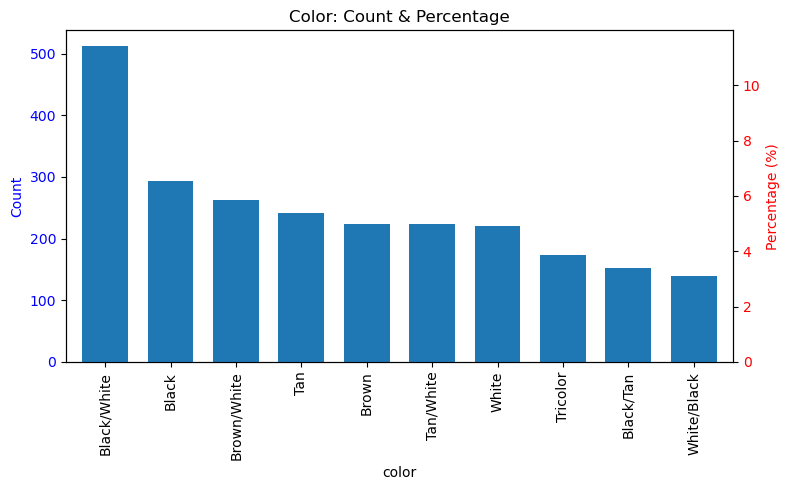

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))  

df['color'].value_counts()[:10].plot(kind='bar', ax=ax, position=0.5, width=0.7)
ax.set_ylabel("Count", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.set_title("Color: Count & Percentage")
#ax.grid()

ax2 = ax.twinx()
(df['color'].value_counts()[:10]/len(df) * 100).plot(kind='bar', ax=ax2, position=0.5, width=0.7)
ax2.set_ylabel("Percentage (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

The majority of dogs are `Black/White`.

### Analysis of numerical attributes

We now switch to the analysis of numerical attributes

Here there is the histogram of each numerical variable in the dataset:

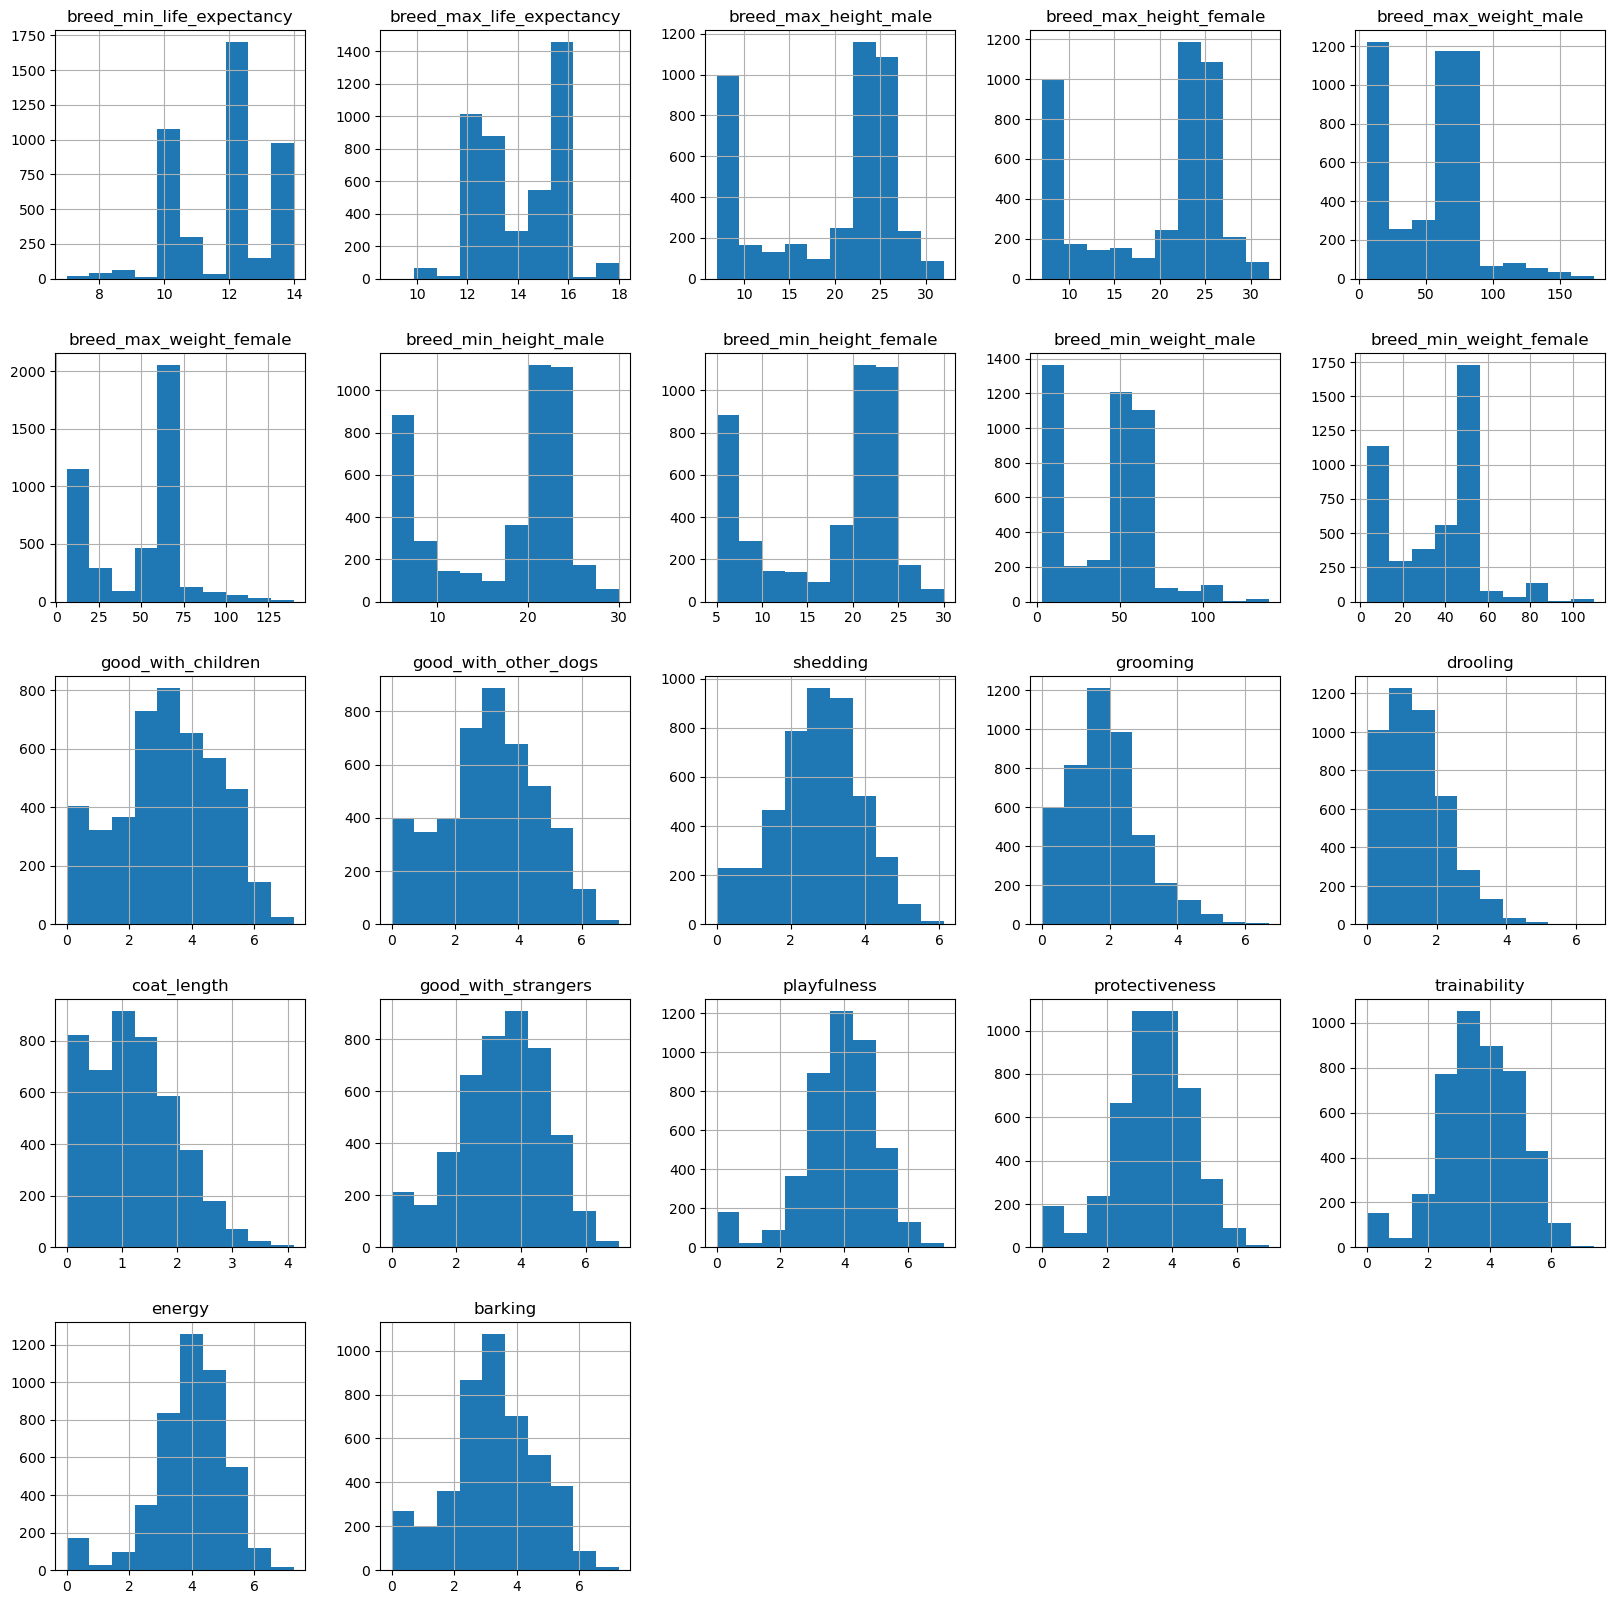

In [61]:
df.iloc[:,13:].hist(figsize=(20,20))
plt.show()

In the following we plot the histograms of the attributes from `breed_min_life_expectancy` up to `breed_min_weight_female` restricting only to the top 6 breeds. Such breeds are highlighted with different colors and as expected they are the responsibles of the 'peaks' in the histograms above for such attributes.

The list of bins ranges from the minimum to the maximum of the considered attribute with a step depending on the distribution of the values attribute.

Histograms of `breed_min_life_expectancy` and `breed_max_life_expectancy` restricting only to top 6 breeds.

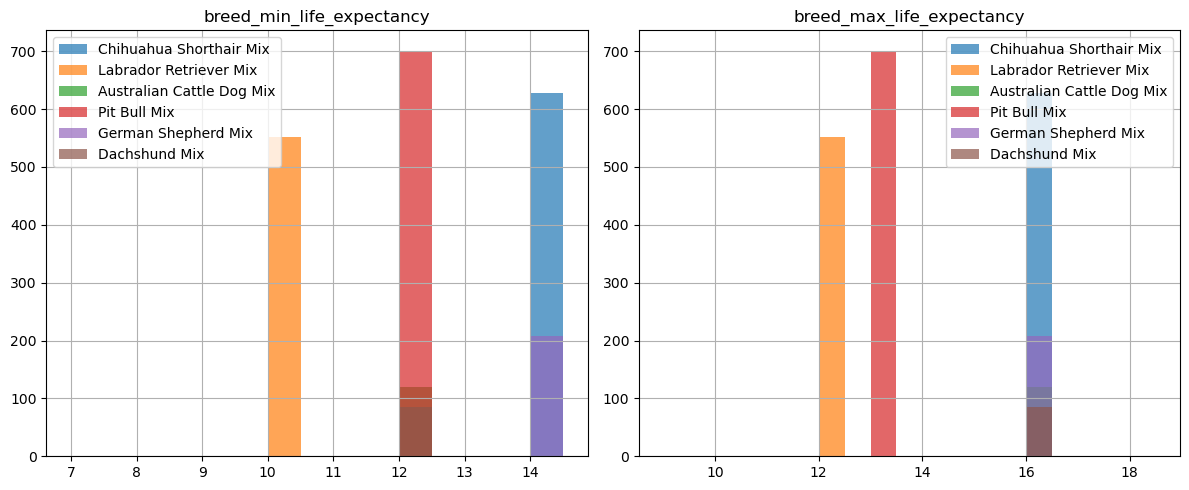

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

column_analyzed1 = 'breed_min_life_expectancy'
list_of_bins = np.arange(np.min(df[column_analyzed1]), np.max(df[column_analyzed1]) + 1, 0.5)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[0].hist(df_analyzed[column_analyzed1], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[0].set_title(column_analyzed1)
    axes[0].grid(True)
    axes[0].legend()


column_analyzed2 = 'breed_max_life_expectancy'
list_of_bins = np.arange(np.min(df[column_analyzed2]), np.max(df[column_analyzed2]) + 1, 0.5)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[1].hist(df_analyzed[column_analyzed2], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[1].set_title(column_analyzed2)
    axes[1].grid(True)
    axes[1].legend()

plt.tight_layout()
plt.show()

From the plot above we see that the `Chihuahua Shortair Mix` have an higher average life expectancy than the other breeds in the top 6. 

Histograms of `breed_min_height_male` and `breed_max_height_male` restricting only to top 6 breeds.

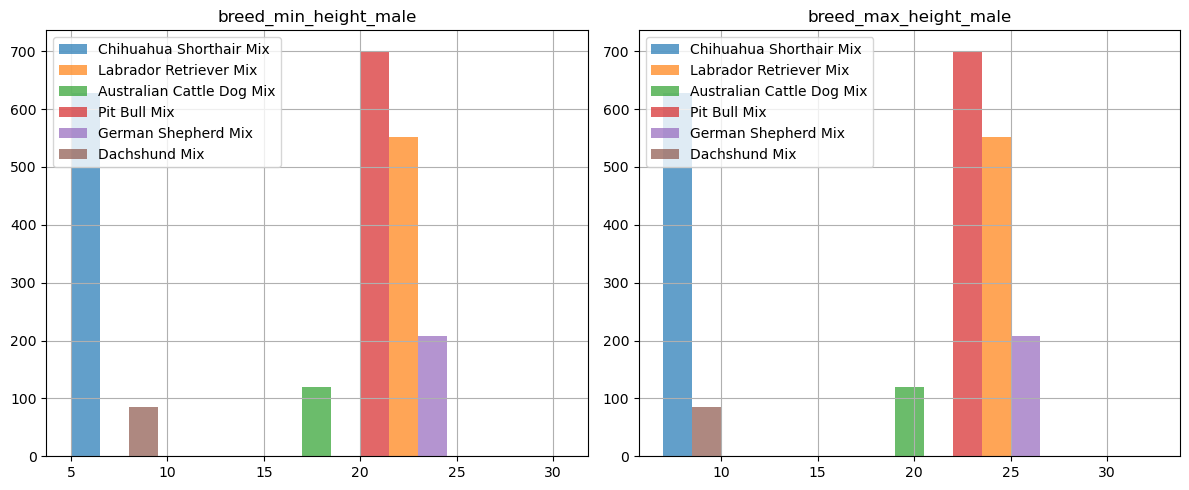

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

column_analyzed1 = 'breed_min_height_male'
list_of_bins = np.arange(np.min(df[column_analyzed1]), np.max(df[column_analyzed1]) + 1, 1.5)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[0].hist(df_analyzed[column_analyzed1], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[0].set_title(column_analyzed1)
    axes[0].grid(True)
    axes[0].legend()

column_analyzed2 = 'breed_max_height_male'
list_of_bins = np.arange(np.min(df[column_analyzed2]), np.max(df[column_analyzed2]) + 1, 1.5)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[1].hist(df_analyzed[column_analyzed2], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[1].set_title(column_analyzed2)
    axes[1].grid(True)
    axes[1].legend()

plt.tight_layout()
plt.show()

From the plot above we see that as expected the `Chihuahua Shortair Mix` is the smallest between the top 6 breeds while the `German Shepherd Mix` is the biggest.

Histograms of `breed_min_height_female` and `breed_max_height_female` restricting only to top 6 breeds.

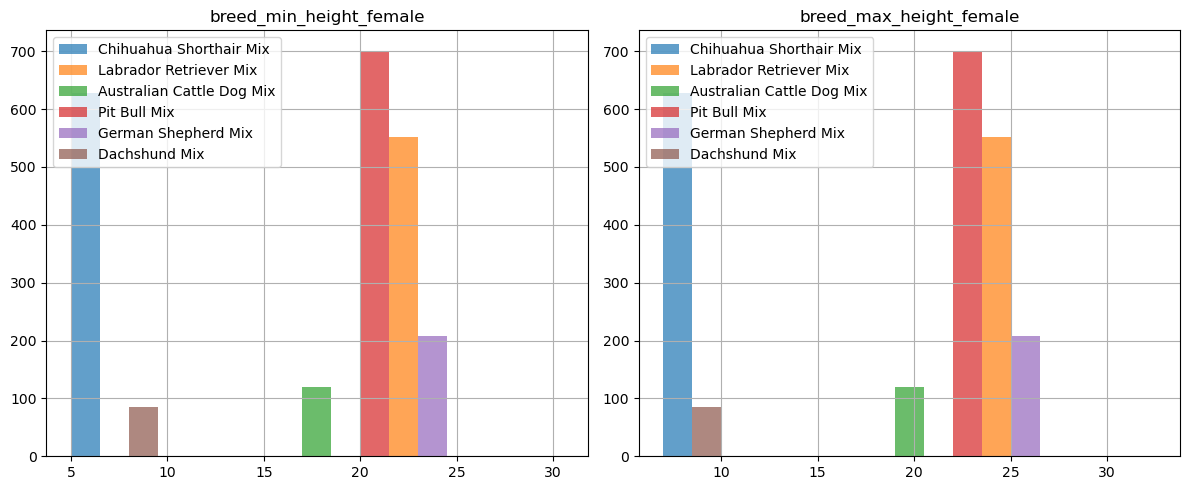

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

column_analyzed1 = 'breed_min_height_female'
list_of_bins = np.arange(np.min(df[column_analyzed1]), np.max(df[column_analyzed1]) + 1, 1.5)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[0].hist(df_analyzed[column_analyzed1], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[0].set_title(column_analyzed1)
    axes[0].grid(True)
    axes[0].legend()

column_analyzed2 = 'breed_max_height_female'
list_of_bins = np.arange(np.min(df[column_analyzed2]), np.max(df[column_analyzed2]) + 1, 1.5)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[1].hist(df_analyzed[column_analyzed2], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[1].set_title(column_analyzed2)
    axes[1].grid(True)
    axes[1].legend()

plt.tight_layout()
plt.show()

From the plot above we see that as expected the `Chihuahua Shortair Mix` is the smallest between the top 6 breeds while the `German Shepherd Mix` is the biggest.

Histograms of `breed_min_weight_male` and `breed_max_weight_male` restricting only to top 6 breeds.

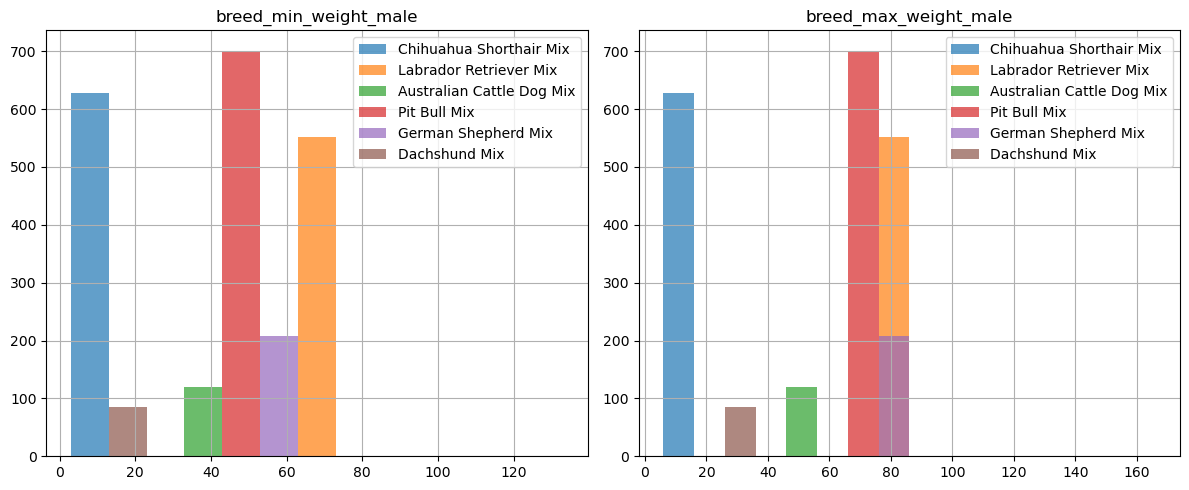

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

column_analyzed1 = 'breed_min_weight_male'
list_of_bins = np.arange(np.min(df[column_analyzed1]), np.max(df[column_analyzed1]) + 1, 10)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[0].hist(df_analyzed[column_analyzed1], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[0].set_title(column_analyzed1)
    axes[0].grid(True)
    axes[0].legend()

column_analyzed2 = 'breed_max_weight_male'
list_of_bins = np.arange(np.min(df[column_analyzed2]), np.max(df[column_analyzed2]) + 1, 10)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[1].hist(df_analyzed[column_analyzed2], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[1].set_title(column_analyzed2)
    axes[1].grid(True)
    axes[1].legend()

plt.tight_layout()
plt.show()

From the plot above we see that as expected the `Chihuahua Shortair Mix` is the lightest between the top 6 breeds while the `Labrador Retriever Mix`, the `German Shepherd Mix` and the `Pit Bull Mix` are the heaviest.

Histograms of `breed_min_weight_female` and `breed_max_weight_female` restricting only to top 6 breeds.

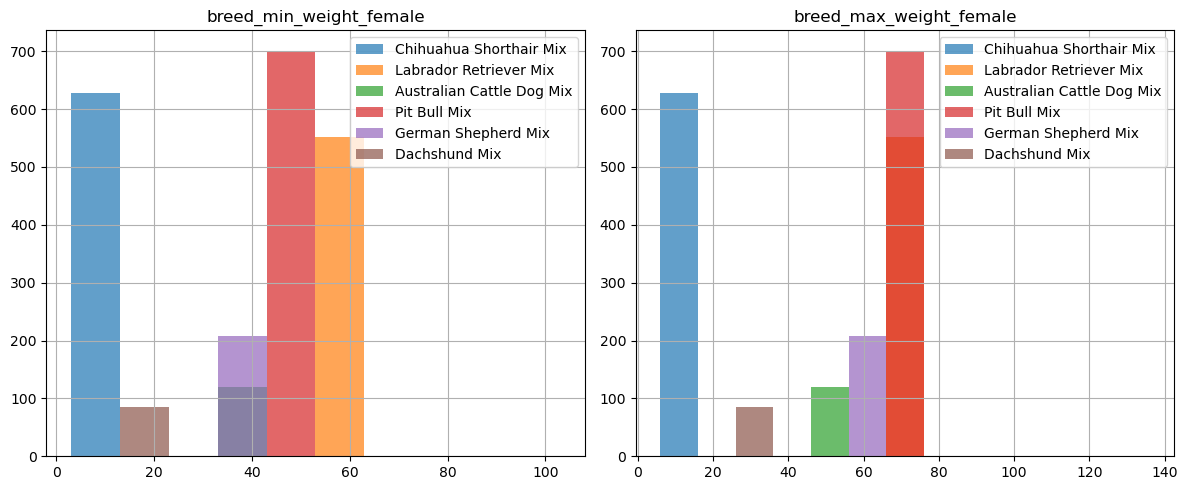

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

column_analyzed1 = 'breed_min_weight_female'
list_of_bins = np.arange(np.min(df[column_analyzed1]), np.max(df[column_analyzed1]) + 1, 10)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[0].hist(df_analyzed[column_analyzed1], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[0].set_title(column_analyzed1)
    axes[0].grid(True)
    axes[0].legend()

column_analyzed2 = 'breed_max_weight_female'
list_of_bins = np.arange(np.min(df[column_analyzed2]), np.max(df[column_analyzed2]) + 1, 10)

for c in df_top6_breeds['breed'].unique():
    df_analyzed = df[df['breed'] == c]
    axes[1].hist(df_analyzed[column_analyzed2], bins=list_of_bins, label=c, alpha=0.7) # The alpha parameter regulates transparency
    axes[1].set_title(column_analyzed2)
    axes[1].grid(True)
    axes[1].legend()

plt.tight_layout()
plt.show()

From the plot above we see that as expected the `Chihuahua Shortair Mix` is the lightest between the top 6 breeds while the `Labrador Retriever Mix`, the `German Shepherd Mix` and the `Pit Bull Mix` are the heaviest.

In [67]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'count',
       'intake_datetime', 'breed_min_life_expectancy',
       'breed_max_life_expectancy', 'breed_max_height_male',
       'breed_max_height_female', 'breed_max_weight_male',
       'breed_max_weight_female', 'breed_min_height_male',
       'breed_min_height_female', 'breed_min_weight_male',
       'breed_min_weight_female', 'good_with_children', 'good_with_other_dogs',
       'shedding', 'grooming', 'drooling', 'coat_length',
       'good_with_strangers', 'playfulness', 'protectiveness', 'trainability',
       'energy', 'barking', 'top6_breeds', 'breed_type'],
      dtype='object')

The following is a scatter matrix for the attributes `good_with_children`, `good_with_other_dogs` and `good_with_strangers` for the top 6 breeds:

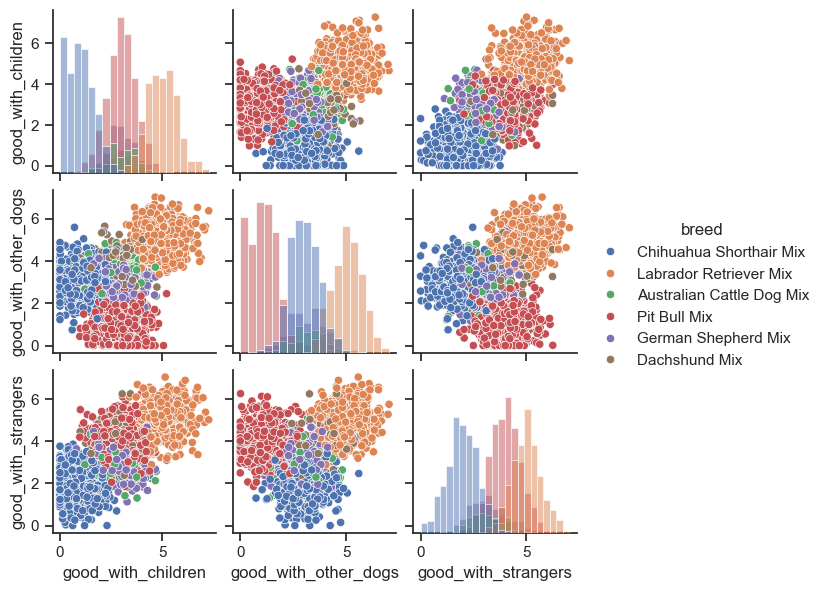

In [68]:
sns.set_theme(style="ticks")
sns.pairplot(df_top6_breeds, diag_kind="hist",
    x_vars=['good_with_children', 'good_with_other_dogs', 'good_with_strangers'],
    y_vars=['good_with_children', 'good_with_other_dogs', 'good_with_strangers'],
    hue = 'breed', height=2)

plt.show()

Data are quite clustered under these attributes. Particularly relevant is the fact that the `Labrador_Retriever_Mix` has the higher values for this attributes and this can contribute to the result obtained above that this breed is the most adopted. Not very exciting result are obtained by `Pit Bull Mix` and `Chihuahua Shorthair Mix` therefore the high number of adoption for such breeds is probably related to the fact that (as noticed above) that they are the top 2 most common breeds in the shelter.

Scatter matrix restricted only to `Pit Bull Mix` 

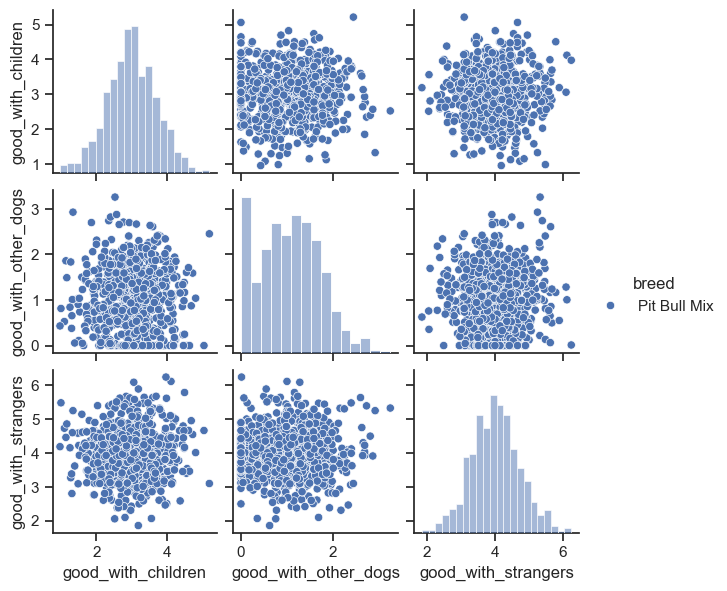

In [69]:
sns.set_theme(style="ticks")
sns.pairplot(df[df['breed'] == 'Pit Bull Mix'], diag_kind="hist",
    x_vars=['good_with_children', 'good_with_other_dogs', 'good_with_strangers'],
    y_vars=['good_with_children', 'good_with_other_dogs', 'good_with_strangers'],
    hue = 'breed', height=2)

plt.show()

Scatter matrix restricted only to `Chihuahua Shorthair Mix` 

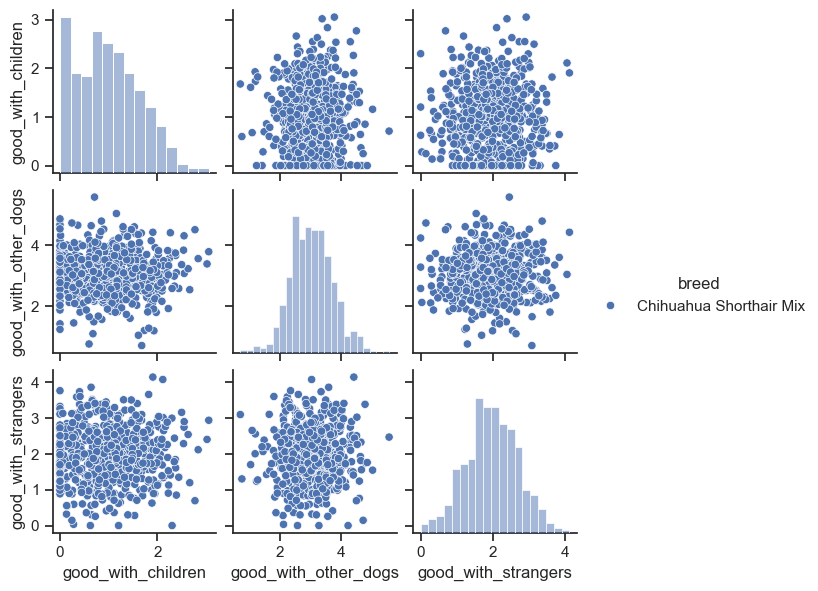

In [70]:
sns.set_theme(style="ticks")
sns.pairplot(df[df['breed'] == 'Chihuahua Shorthair Mix'], diag_kind="hist",
    x_vars=['good_with_children', 'good_with_other_dogs', 'good_with_strangers'],
    y_vars=['good_with_children', 'good_with_other_dogs', 'good_with_strangers'],
    hue = 'breed', height=2)

plt.show()

The following is a scatter matrix for the attributes `playfulness`, `protectiveness`, `trainability`, `energy` and `barking` for the top 6 breeds:

This answer the question: 'Are breeds different w.r.t. playfulness, protectiveness. etc.?'

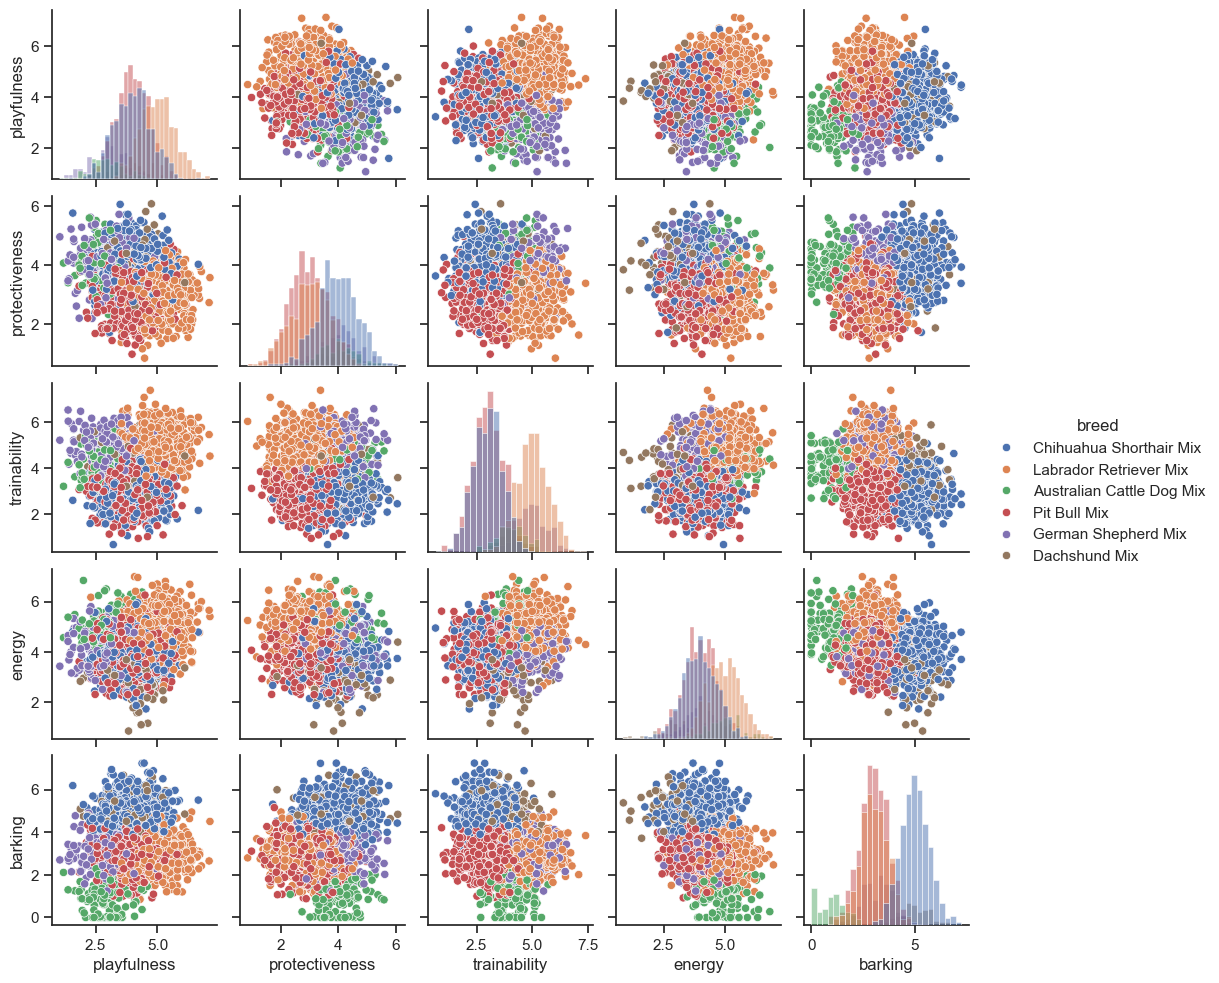

In [71]:
sns.set_theme(style="ticks")
sns.pairplot(df_top6_breeds, diag_kind="hist",
    x_vars=['playfulness', 'protectiveness', 'trainability','energy', 'barking'],
    y_vars=['playfulness', 'protectiveness', 'trainability','energy', 'barking'],
    hue = 'breed', height=2)

plt.show()

In the plot above the different breeds are a bit less visibly recognizable than in the case of analyzing `good_with_children`, `good_with_other_dogs` and `good_with_strangers`.

What can be seen is that medianly dogs that are a Labrador Retriever hybrid have better values overall for the attributes `good_with_children`,`good_with_other_dogs`,`good_with_strangers`, `playfulness`, `protectiveness`, `trainability` and `energy`

In [72]:
median_num = (df.groupby('breed')[['good_with_children','good_with_other_dogs','good_with_strangers', 'playfulness', 'protectiveness', 'trainability', 'energy']].median()).mean(1)
sorted(median_num.items(), key = lambda item : -item[1])

[('St. Bernard Rough Coat/Labrador Retriever', 4.977988367078817),
 ('Keeshond Mix', 4.958816146923331),
 ('Labrador Retriever/Flat Coat Retriever', 4.896290097720571),
 ('Yorkshire Terrier/Miniature Schnauzer', 4.866481312318885),
 ('Treeing Walker Coonhound/Labrador Retriever', 4.82728218951931),
 ('Pointer/Labrador Retriever', 4.814770986084267),
 ('Labrador Retriever/Blue Lacy', 4.805834416842182),
 ('Soft Coated Wheaten Terrier/Labrador Retriever', 4.803617283907391),
 ('Airedale Terrier/Labrador Retriever', 4.794447744726193),
 ('Labrador Retriever/Pharaoh Hound', 4.789712456624249),
 ('Labrador Retriever/Catahoula', 4.763571284114335),
 ('Labrador Retriever/Black Mouth Cur', 4.749445758488113),
 ('Papillon/Skye Terrier', 4.727091778611443),
 ('Labrador Retriever/Pointer', 4.723439664545915),
 ('Labrador Retriever Mix', 4.721101562238048),
 ('Bruss Griffon/Yorkshire Terrier', 4.719644553159129),
 ('Labrador Retriever', 4.658019719382078),
 ('Labrador Retriever/Australian Shepherd

The following is a scatter matrix for the attributes `shedding`, `grooming` and `coat_length` for the top 6 breeds:

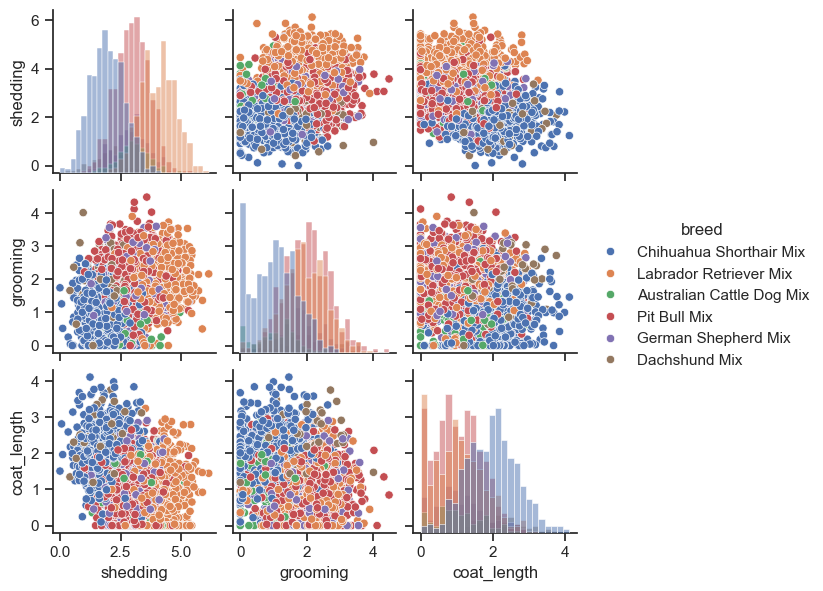

In [73]:
sns.set_theme(style="ticks")
sns.pairplot(df_top6_breeds, diag_kind="hist",
    x_vars=['shedding', 'grooming','coat_length'],
    y_vars=['shedding', 'grooming','coat_length'],
    hue = 'breed', height=2)

plt.show()

A positive correlation would be expected bewteen the three attributes. This is not clear from the plot above but more in depth analysis would be required.

## Data Quality
- *check for missing values, duplicates, redundant variables, outliers*:
    - how many missing values are there for each variable?
    - can you see outliers in the boxplots?
    - can you see outliers in the scatter plots?
    - what's the difference between these two kinds of outliers?
- *handle these issues*

To count the number of missing values for each attribute we simply do:

In [74]:
df.isnull().sum() 

date_of_birth                  0
outcome_subtype              455
outcome_type                   0
sex_upon_outcome               0
outcome_datetime               0
breed                          0
color                          0
found_location                 0
intake_condition               0
intake_type                    0
sex_upon_intake                0
count                          0
intake_datetime                0
breed_min_life_expectancy    113
breed_max_life_expectancy    113
breed_max_height_male        113
breed_max_height_female      113
breed_max_weight_male        113
breed_max_weight_female      113
breed_min_height_male        113
breed_min_height_female      113
breed_min_weight_male        113
breed_min_weight_female      113
good_with_children             0
good_with_other_dogs           0
shedding                       0
grooming                       0
drooling                       0
coat_length                    0
good_with_strangers            0
playfulnes

Even if they do not appear in the count above, there are other missing values. In the attributes from `good_with_children` up to `barking`, the 113 objects that have missing values in the attributes from `breed_min_life_expectancy` up to `breed_min_weight_female`, also have $0.0$ value for such attributes.

This has been verified in the following two cells:

In [75]:
count = 0
lista = []

for i, breed in enumerate(df['breed']):
    somma = df['good_with_children'][i]+df['good_with_other_dogs'][i]+df['shedding'][i]+df['grooming'][i]+df['drooling'][i]+df['coat_length'][i]+\
    df['good_with_strangers'][i]+df['playfulness'][i]+df['protectiveness'][i]+df['trainability'][i]+df['energy'][i]+df['barking'][i]
    if somma == 0.0:
        count += 1
        lista.append(breed)
        print(breed, somma)

print('\n')
print('Number of 0.0 values: ', count)

Jack Russell Terrier Mix 0.0
Rat Terrier Mix 0.0
Catahoula Mix 0.0
Bluetick Hound Mix 0.0
Queensland Heeler Mix 0.0
Chihuahua Longhair Mix 0.0
Manchester Terrier Mix 0.0
Catahoula Mix 0.0
Cairn Terrier Mix 0.0
Miniature Poodle Mix 0.0
Gordon Setter Mix 0.0
Staffordshire Mix 0.0
Jack Russell Terrier Mix 0.0
Miniature Poodle Mix 0.0
Cairn Terrier Mix 0.0
Bull Terrier Miniature Mix 0.0
Jack Russell Terrier Mix 0.0
Catahoula Mix 0.0
Miniature Poodle Mix 0.0
Greater Swiss Mountain Dog Mix 0.0
Pointer Mix 0.0
Catahoula Mix 0.0
Dachshund Wirehair Mix 0.0
Collie Rough Mix 0.0
Jack Russell Terrier Mix 0.0
Black Mouth Cur Mix 0.0
Chihuahua Longhair 0.0
Miniature Poodle Mix 0.0
Jack Russell Terrier Mix 0.0
Jack Russell Terrier Mix 0.0
Miniature Poodle Mix 0.0
Alaskan Husky Mix 0.0
Chihuahua Longhair Mix 0.0
Airedale Terrier Mix 0.0
Kuvasz Mix 0.0
Chihuahua Longhair Mix 0.0
Jack Russell Terrier Mix 0.0
Pointer Mix 0.0
Chihuahua Longhair Mix 0.0
Dachshund Longhair Mix 0.0
Affenpinscher Mix 0.0
Soft

In [76]:
list_of_cols = ['breed_min_life_expectancy', 'breed_max_life_expectancy', 'breed_max_height_male', 'breed_max_height_female',
'breed_max_weight_male', 'breed_max_weight_female', 'breed_min_height_male', 'breed_min_height_female', 
'breed_min_weight_male', 'breed_min_weight_female']

for col in list_of_cols:
    lista1 = []
    for i, breed in enumerate(df['breed']):
        if np.isnan(df[col][i]):
            lista1.append(breed)
    for elem in lista1:
        if elem not in lista:
            print(False)
    for elem in lista:
        if elem not in lista1:
            print(False)

Since the code above gives no output then the $113$ objects with missing values in the attributes from `breed_min_life_expectancy` up to `breed_min_weight_female`, also have $0.0$ value in the attributes from `good_with_children` up to `barking`.

To see if there are duplicate we write:

In [77]:
len(df.drop_duplicates()) - len(df)

0

The result is zero so there are no duplicates.

Let's check if there are outliers

We first implement the following fuction:

In [78]:
def is_outlier(x, k=1.5):

    q1= np.quantile(x, 0.25) # 1st quartile
    q3= np.quantile(x, 0.75) # 3st quartile
    iqr= q3-q1

    res=np.zeros(len(x), dtype=bool)

    for i,v in enumerate(x):
        if v< q1- k*iqr or v> q3 + k*iqr:
            res[i]=True

    return res

Then we do the box-plots firstly for the attributes from `good_with_children` up to `barking`

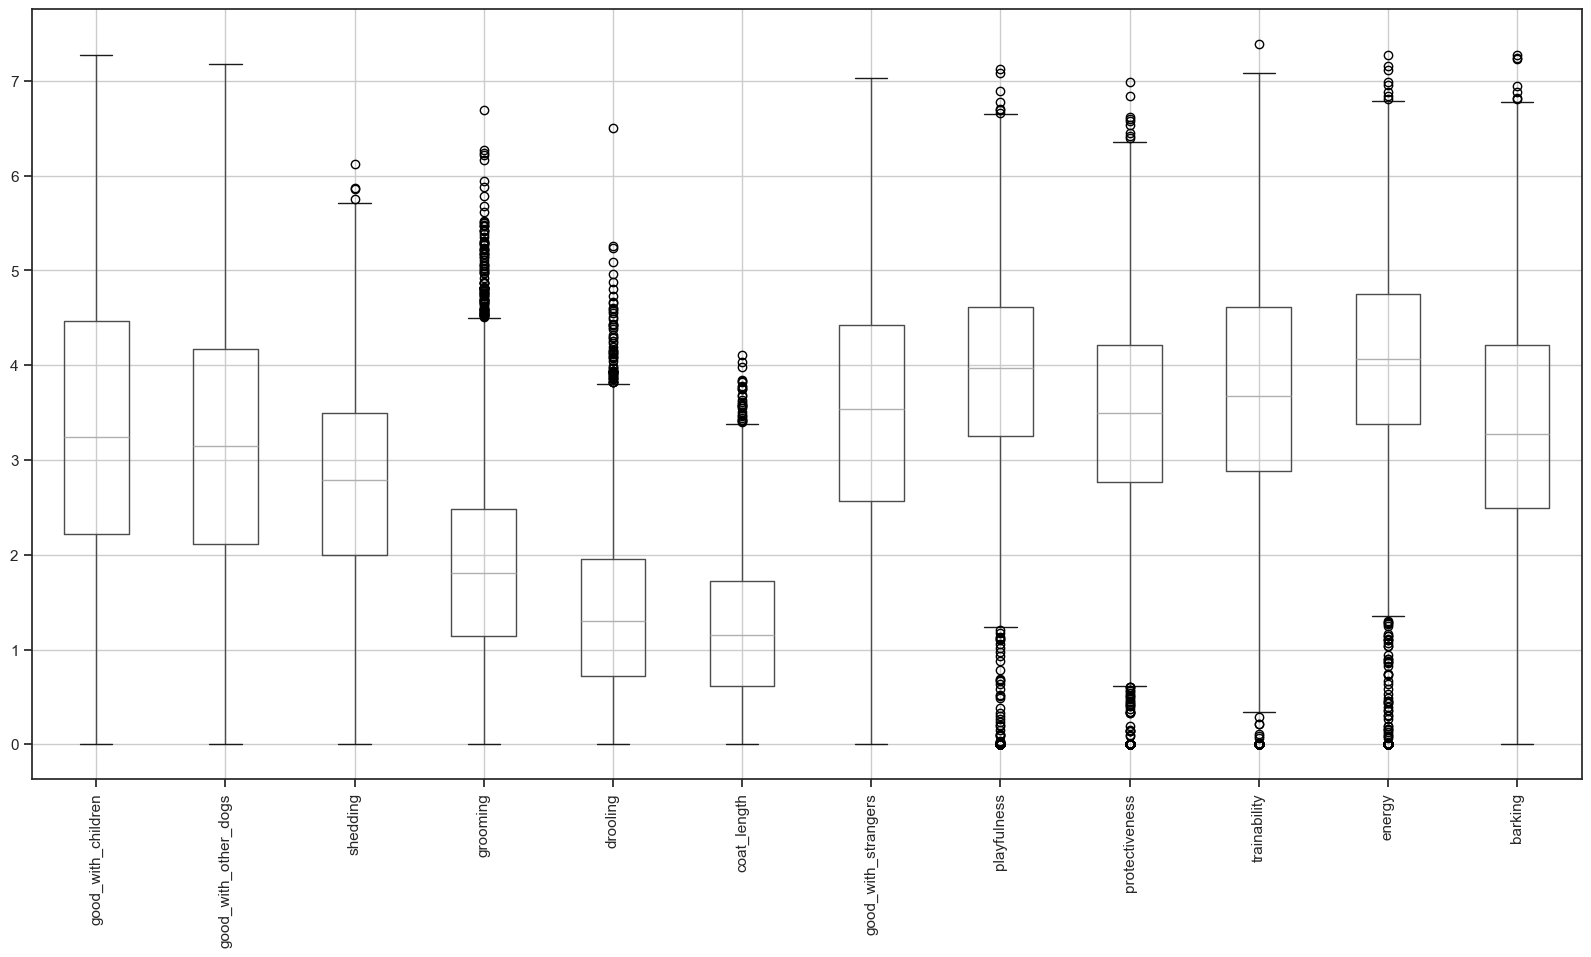

In [79]:
plt.figure(figsize=(20,10))
df.boxplot(column=df.loc[:, 'good_with_children':'barking'].columns.tolist())
plt.xticks(rotation = 'vertical')
plt.show()

and we check the number of outliers for each attribute by writing:

In [80]:
d = {}

for c in df.loc[:, 'good_with_children':'barking'].columns.tolist():
    arr = is_outlier(df[c])
    d[c] = len(df[arr])

print(d)

{'good_with_children': 0, 'good_with_other_dogs': 0, 'shedding': 4, 'grooming': 102, 'drooling': 59, 'coat_length': 27, 'good_with_strangers': 0, 'playfulness': 200, 'protectiveness': 195, 'trainability': 139, 'energy': 202, 'barking': 7}


Some attributes seem to have a lot of outliers but are these really outliers?

The various outliers in the low range of the box plots could be justified by the presence of $0.0$ values in the attributes above for $113$ objects as well as by the presence of dog breeds with lower values of these attributes. Remember, in fact, that the box plot representation above contains all the breeds. The outliers in the high range could be explained in the same way i.e. with breeds that tend to have higher values for these attributes. More on that in the next section.

Secondly we do the box-plots for the attributes from `breed_min_life_expectancy` up to `breed_min_weight_female`

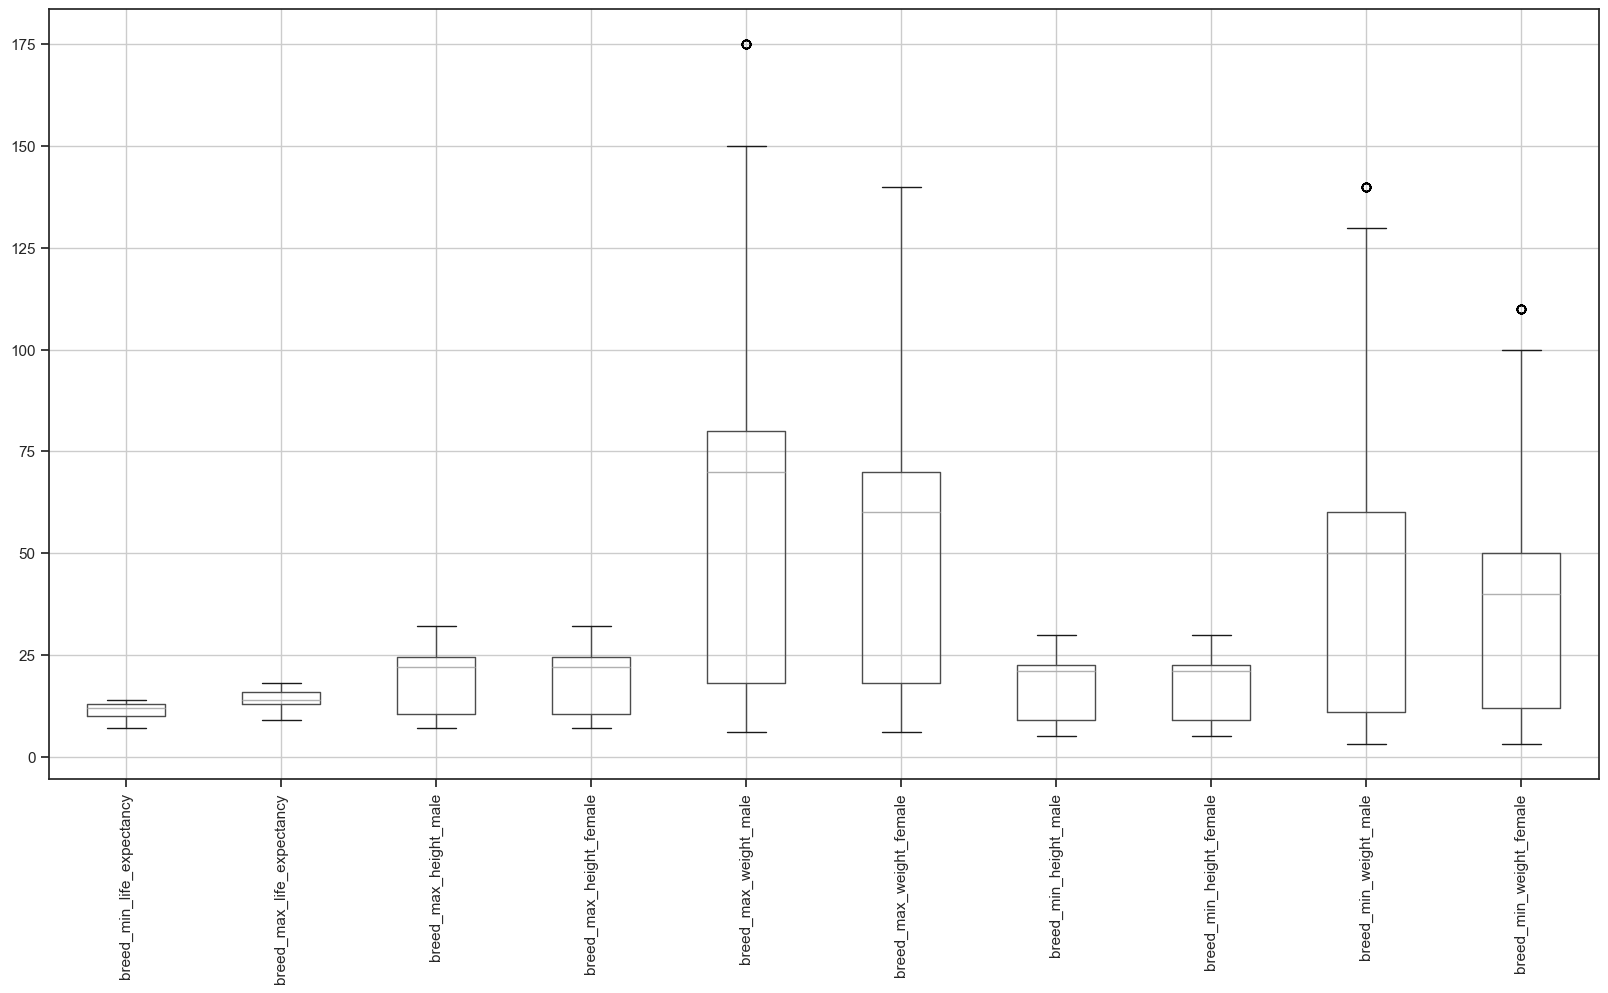

In [81]:
plt.figure(figsize=(20,10))
df.boxplot(column=df.loc[:, 'breed_min_life_expectancy':'breed_min_weight_female'].columns.tolist())
plt.xticks(rotation = 'vertical')
plt.show()

In [82]:
d1 = {}

for c in df.loc[:, 'breed_min_life_expectancy':'breed_min_weight_female'].columns.tolist():
    arr = is_outlier(df[c])
    d1[c] = len(df[arr])

print(d1)

{'breed_min_life_expectancy': 0, 'breed_max_life_expectancy': 0, 'breed_max_height_male': 0, 'breed_max_height_female': 0, 'breed_max_weight_male': 0, 'breed_max_weight_female': 0, 'breed_min_height_male': 0, 'breed_min_height_female': 0, 'breed_min_weight_male': 0, 'breed_min_weight_female': 0}


By applying again the function `is_outlier`, we see that for these attributes there are no outliers.

Outliers can be seen also by doing scatter plots of the various attributes. This has been already done in the previous section but no evident outliers can be found.

The difference in outlier analysis between the two approaches is the following:


In box plots we can only see outliers related to a single attribute (univariate outliers) while in scatter plots we can access to outliers related to pairs of numerical attributes (bivariate outliers) classified by one or more categorical attributes. Some values of a data object could be considered as not outliers in respect to the attribute they belong to but as such when related to the values of other attributes of the same data object. 

Let's now handle the null values found above:

The null values in the `outcome_subtype` feature are handled by substituting such values with 'Unknown'

In [83]:
df['outcome_subtype'] = df['outcome_subtype'].fillna('Unknown')

In [84]:
df.isnull().sum()

date_of_birth                  0
outcome_subtype                0
outcome_type                   0
sex_upon_outcome               0
outcome_datetime               0
breed                          0
color                          0
found_location                 0
intake_condition               0
intake_type                    0
sex_upon_intake                0
count                          0
intake_datetime                0
breed_min_life_expectancy    113
breed_max_life_expectancy    113
breed_max_height_male        113
breed_max_height_female      113
breed_max_weight_male        113
breed_max_weight_female      113
breed_min_height_male        113
breed_min_height_female      113
breed_min_weight_male        113
breed_min_weight_female      113
good_with_children             0
good_with_other_dogs           0
shedding                       0
grooming                       0
drooling                       0
coat_length                    0
good_with_strangers            0
playfulnes

The null values in attributes from `breed_min_life_expectancy` up to `breed_min_weight_female` are handled by substituting such values with $0.0$ (no more than that can be done since these attributes are breed specific and not having other infos on such breeds we cannot fill the missing values with anything). In this way we have for the attributes from `breed_min_life_expectancy` up to `barking` $113$ objects with zero values for these attribute. These objects will be better handled in the next section.

In [85]:
for col in df.loc[:, 'breed_min_life_expectancy':'breed_min_weight_female'].columns.tolist():
    df[col] = df[col].fillna(float(0))

In [86]:
df.isnull().sum()

date_of_birth                0
outcome_subtype              0
outcome_type                 0
sex_upon_outcome             0
outcome_datetime             0
breed                        0
color                        0
found_location               0
intake_condition             0
intake_type                  0
sex_upon_intake              0
count                        0
intake_datetime              0
breed_min_life_expectancy    0
breed_max_life_expectancy    0
breed_max_height_male        0
breed_max_height_female      0
breed_max_weight_male        0
breed_max_weight_female      0
breed_min_height_male        0
breed_min_height_female      0
breed_min_weight_male        0
breed_min_weight_female      0
good_with_children           0
good_with_other_dogs         0
shedding                     0
grooming                     0
drooling                     0
coat_length                  0
good_with_strangers          0
playfulness                  0
protectiveness               0
trainabi

## Data Engineering
- are there other variables that you could create?
    - dog's age
    - lenght of stay
    - is the dog mixed breed?
    - ...
- *transform variables. Do some variables need to be normalized? Should you one-hot encode some variables?*
    - from the data distribution step, you might have identified some variables that need to be transformed;
    - does it make sense to keep the color as numerical? would it be better to check all possile dog colors and create a binary column for each color?
- *plot pairwise correlation*
- *remove redundant variables*


Let's create two new columns linked to the dog age, in particular `age_upon_intake` and `age_upon_outcome`. Both quantities are expressed in years. 

In [87]:
df['age_upon_intake'] = (df['intake_datetime'] - df['date_of_birth']).dt.days/365

In [88]:
df['age_upon_outcome'] = (df['outcome_datetime'] - df['date_of_birth']).dt.days/365

Another useful column could be one that computes (in years) for how much time the dog remains in the shelter. We call this column `length_of_stay`.

In [89]:
df['length_of_stay'] = (df['outcome_datetime'] - df['intake_datetime']).dt.days/365

The column `count` is completely useless since it takes always the value $1$ for each row in the dataset. This can be easily seen by computing both the mean and the standard deviation of such column: 

In [90]:
print(df['count'])
print('\n')
print('mean = ', np.mean(df['count']), 'std = ', np.std(df['count']))

0       1
1       1
2       1
3       1
4       1
       ..
4482    1
4483    1
4484    1
4485    1
4486    1
Name: count, Length: 4487, dtype: int64


mean =  1.0 std =  0.0


As expected the result is $1$ for the mean and $0$ for the standard deviation, so we can drop the column as follows:

In [91]:
df = df.drop(columns = 'count')

Let's know calculate (and visualize through a heatmap) the Pearson's correlation coefficients for all the numerical values between `breed_min_life_expectancy` and `barking`:

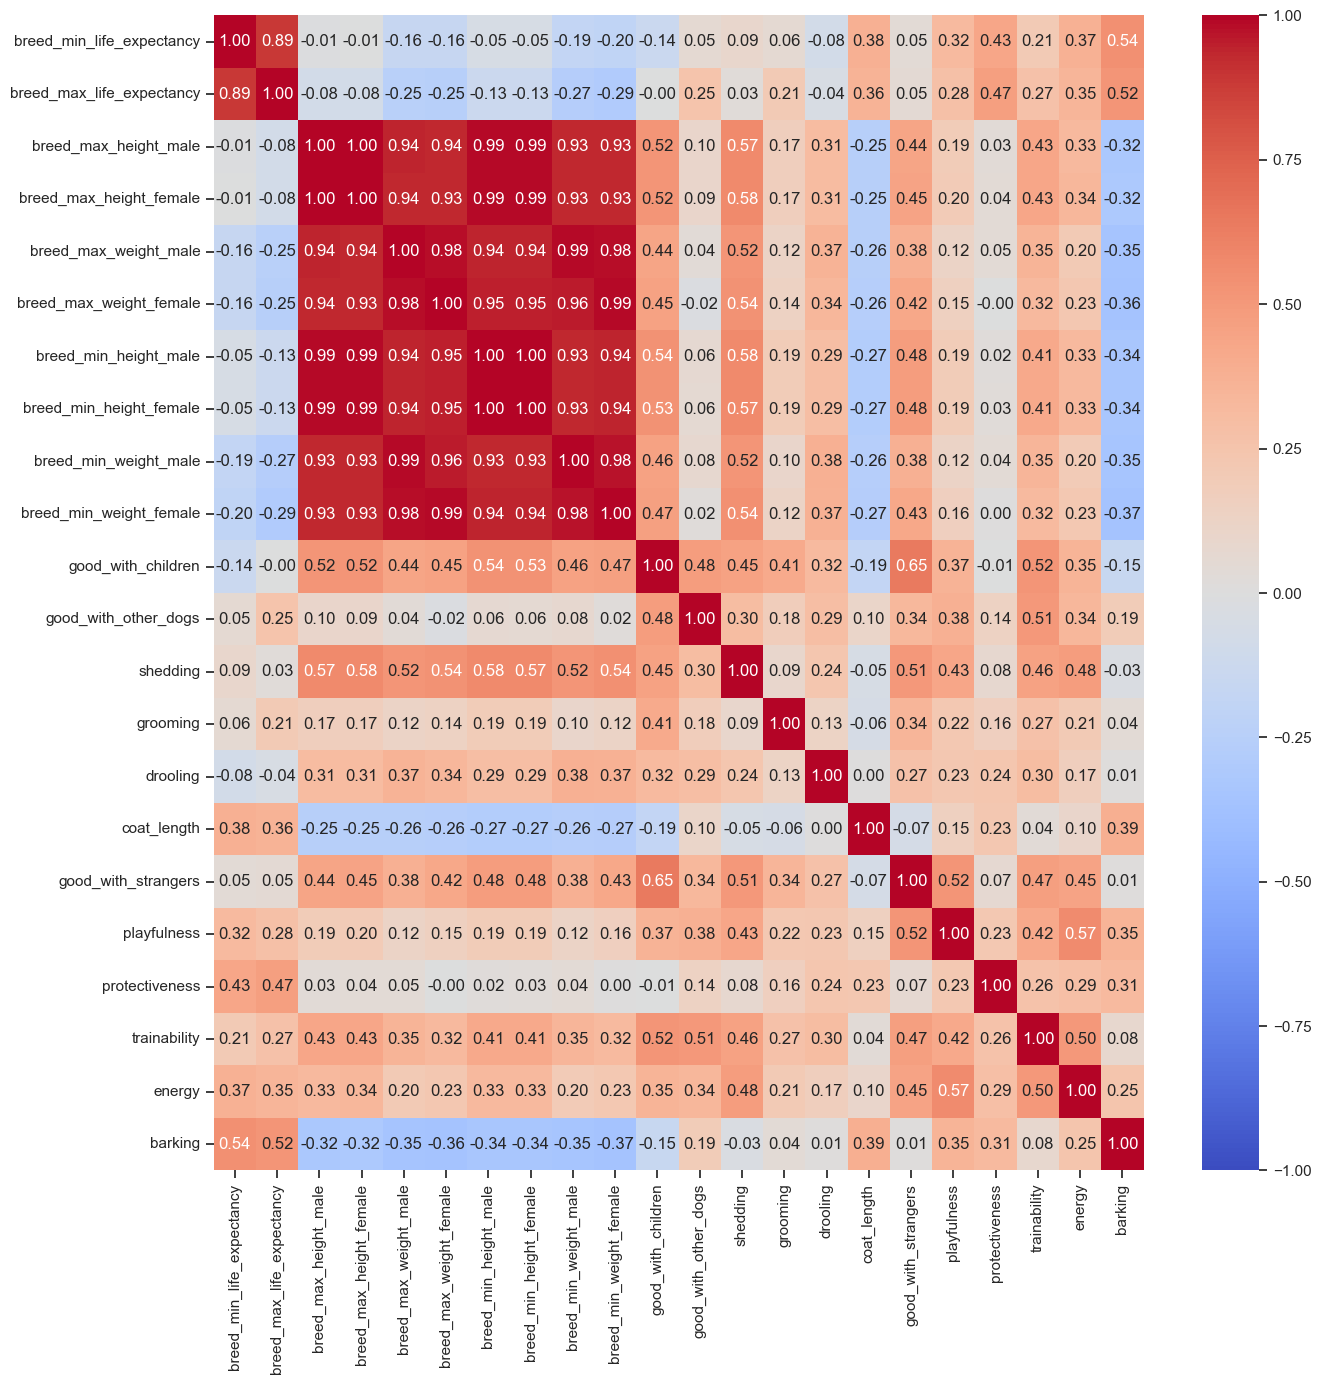

In [92]:
plt.figure(figsize=(15,15))
sns.heatmap(df.loc[:, 'breed_min_life_expectancy' : 'barking'].corr(numeric_only = True),fmt= '.2f',cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.show()

What is immediately noticeable in the plot above is the $8 \times 8$ square in the top left with highly correlated variables. Given this redundancy some variables can be aggregated.

In particular the breed min/max characteristics (life expectancy, height and weight) are replaced with their mean:

In [93]:
breed_mean_life_expectancy = (df['breed_min_life_expectancy'] + df['breed_max_life_expectancy'])/2
breed_mean_height = (df['breed_max_height_male'] + df['breed_min_height_male'] + df['breed_max_height_female'] + df['breed_min_height_female'])/4
breed_mean_weight = (df['breed_max_weight_male'] + df['breed_min_weight_male'] + df['breed_max_weight_female'] + df['breed_min_weight_female'])/4

Such new values are added as new columns of the DataFrame:

In [94]:
df['breed_avg_life_expectancy'] = breed_mean_life_expectancy
df['breed_avg_height'] = breed_mean_height
df['breed_avg_weight'] = breed_mean_weight

In [95]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'intake_datetime',
       'breed_min_life_expectancy', 'breed_max_life_expectancy',
       'breed_max_height_male', 'breed_max_height_female',
       'breed_max_weight_male', 'breed_max_weight_female',
       'breed_min_height_male', 'breed_min_height_female',
       'breed_min_weight_male', 'breed_min_weight_female',
       'good_with_children', 'good_with_other_dogs', 'shedding', 'grooming',
       'drooling', 'coat_length', 'good_with_strangers', 'playfulness',
       'protectiveness', 'trainability', 'energy', 'barking', 'top6_breeds',
       'breed_type', 'age_upon_intake', 'age_upon_outcome', 'length_of_stay',
       'breed_avg_life_expectancy', 'breed_avg_height', 'breed_avg_weight'],
      dtype='object')

And finally we substitute the old columns with the new ones in the correct order. This is done in the following two cells:

In [96]:
df = df.drop(columns = ['breed_max_life_expectancy', 'breed_max_height_male', 'breed_max_height_male', 'breed_min_height_male', 'breed_max_height_female','breed_min_height_female','breed_max_weight_male','breed_min_weight_male','breed_max_weight_female','breed_min_weight_female'])

In [97]:
df = df.loc[:, ['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'intake_datetime',
       'breed_avg_life_expectancy', 'breed_avg_height', 'breed_avg_weight',
       'good_with_children', 'good_with_other_dogs', 'shedding', 'grooming',
       'drooling', 'coat_length', 'good_with_strangers', 'playfulness',
       'protectiveness', 'trainability', 'energy', 'barking', 'breed_type',
       'top6_breeds', 'age_upon_intake', 'age_upon_outcome', 'length_of_stay']]

In [98]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'intake_datetime',
       'breed_avg_life_expectancy', 'breed_avg_height', 'breed_avg_weight',
       'good_with_children', 'good_with_other_dogs', 'shedding', 'grooming',
       'drooling', 'coat_length', 'good_with_strangers', 'playfulness',
       'protectiveness', 'trainability', 'energy', 'barking', 'breed_type',
       'top6_breeds', 'age_upon_intake', 'age_upon_outcome', 'length_of_stay'],
      dtype='object')

Let's see how the correlation matrix looks like now

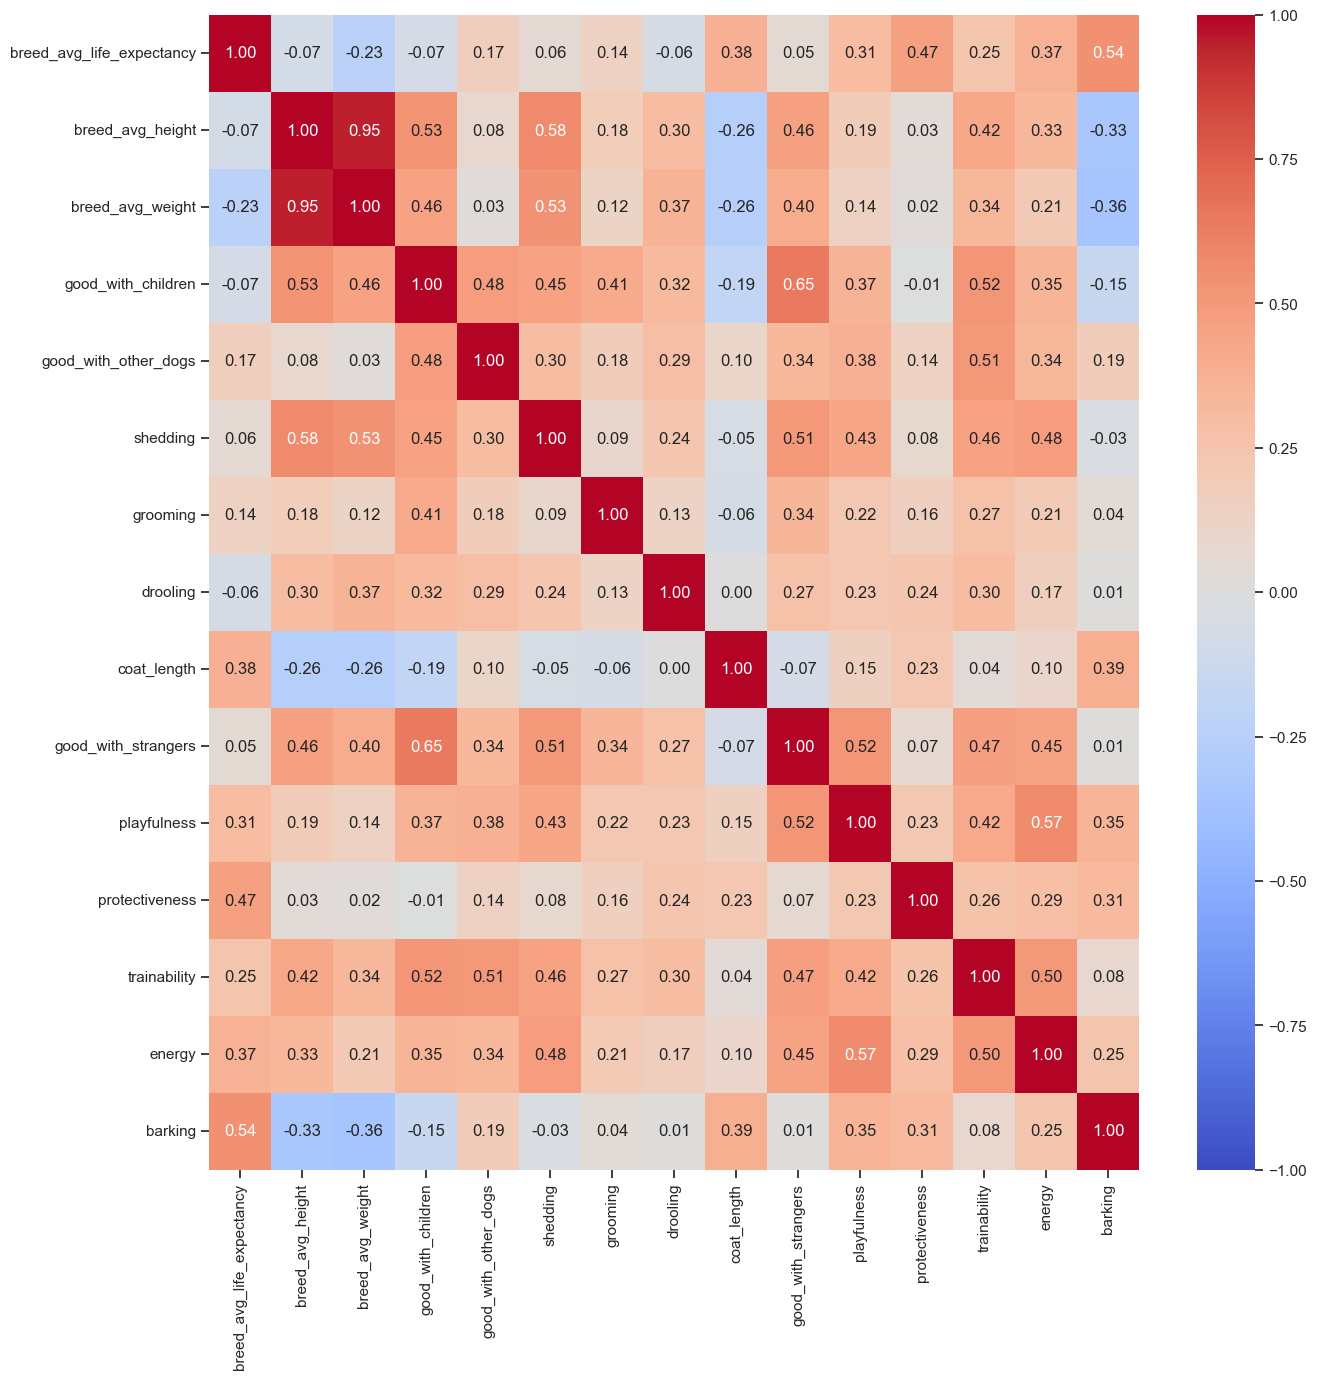

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(df.loc[:, 'breed_avg_life_expectancy' : 'barking'].corr(numeric_only = True),fmt= '.2f',cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.show()

There is still a very high correlation as expected between `breed_avg_height` and `breed_avg_weight`. But since they are physically different quantities it doesn't make sense to calculate the average between the two.

In the previous section we highlighted the presence of $113$ objects with $0.0$ values in the columns from `breed_avg_life_expectancy` up to `barking`. We can deal with such values by adding a boolean column `missing_values` which allows us to easily filter the objects with no missing values: 

In [100]:
df['missing_values'] = df.loc[:, 'breed_avg_life_expectancy':'barking'].sum(1) == 0 # We sum along the columns

In the following there are some examples of plot after filtering out the missing values: 

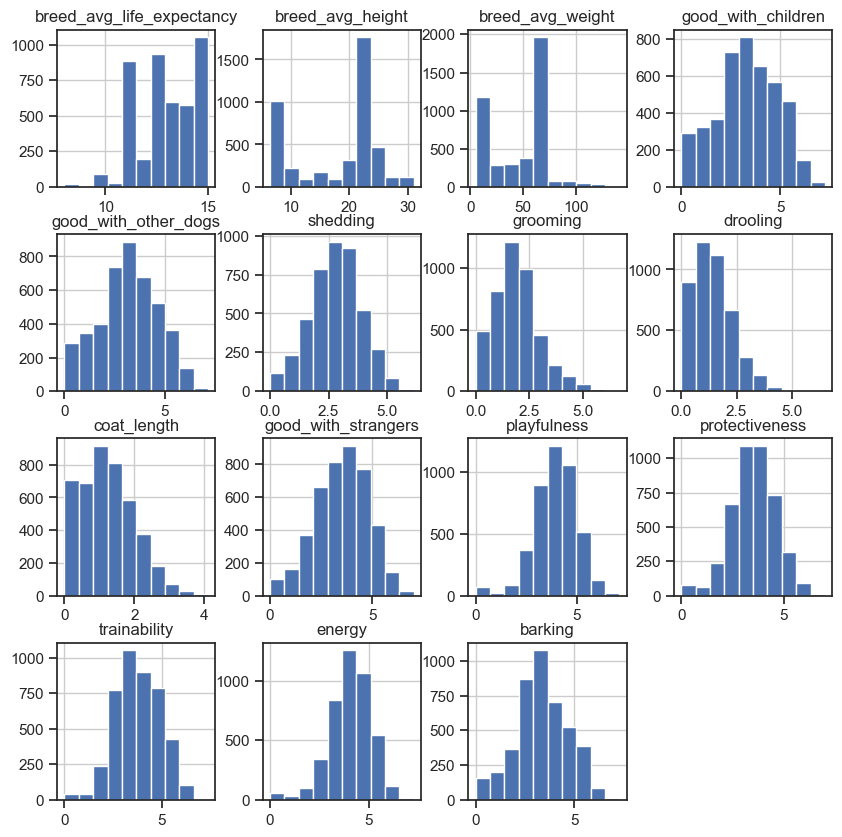

In [101]:
df[df['missing_values'] == False].loc[:, 'breed_avg_life_expectancy':'barking'].hist(figsize = (10,10))
plt.show()

From the boxplots in the previous section we noticed the precence of fliers but we weren't sure if those were real outliers. Let's see these plots again after having filtered out the missing values:

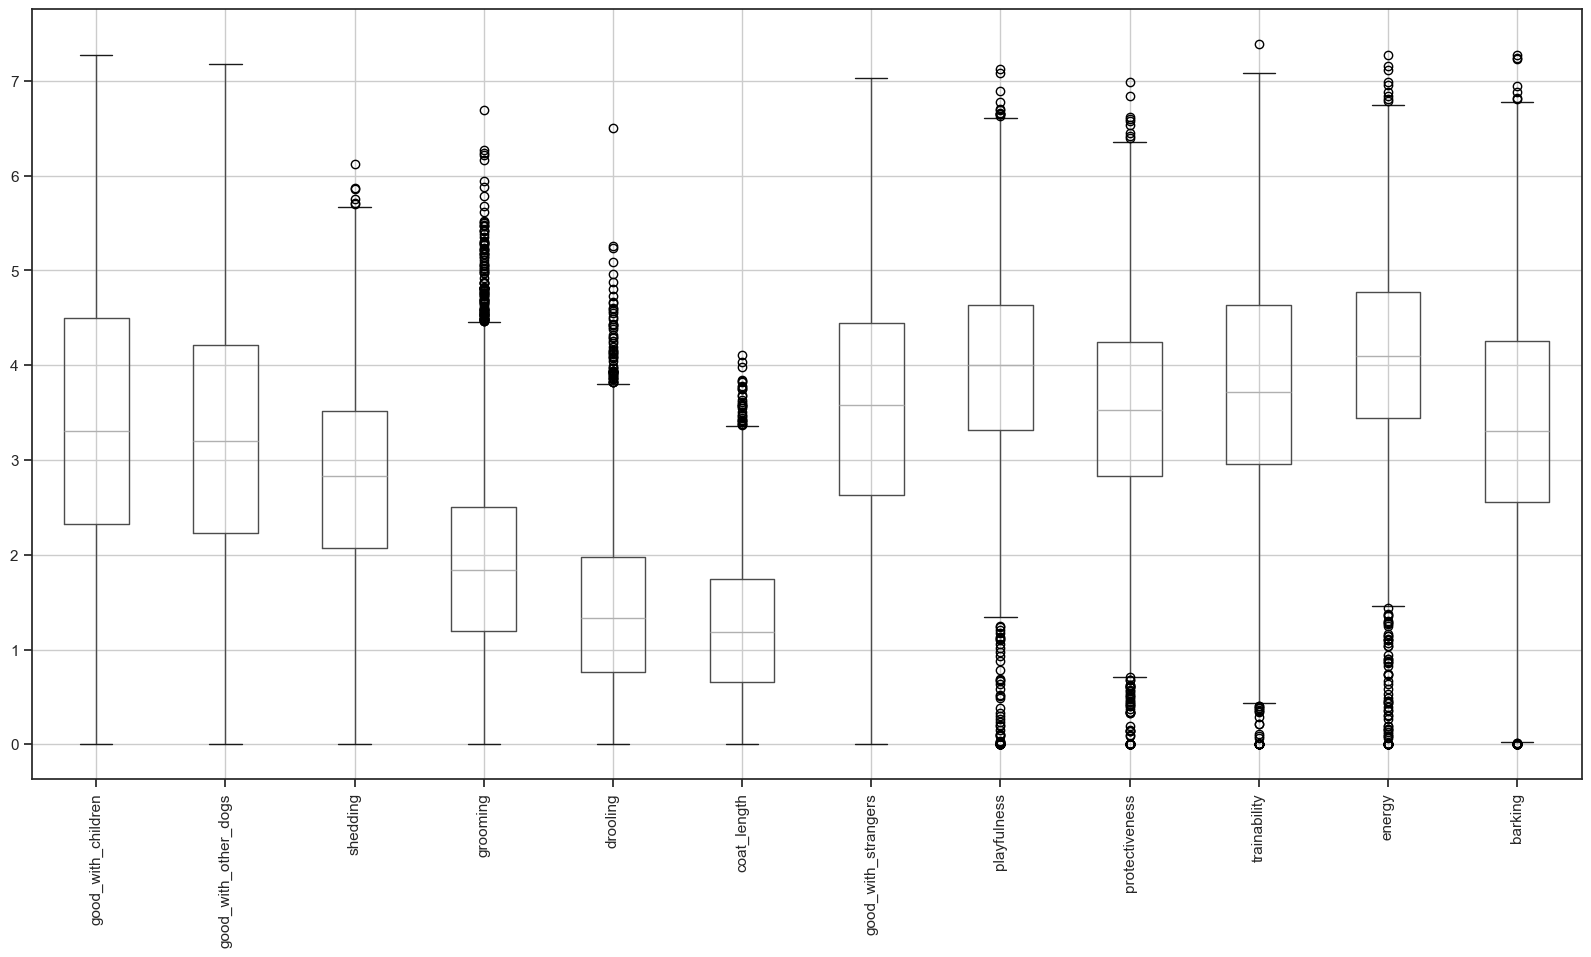

In [102]:
plt.figure(figsize=(20,10))
df[df['missing_values'] == False].boxplot(column=df.loc[:, 'good_with_children':'barking'].columns.tolist())
plt.xticks(rotation = 'vertical')
plt.show()

We can see that there are some less fliers in the low range part but still seems that a lot remains.

Let's proceed like that. There are a lot of fliers in the high range of the attributes `grooming`, `drooling` and `coat_lenght` so let's identify the breeds with the highest values of these attribute and plot the various boxplots for them:

In [103]:
df[df['grooming'] == df['grooming'].max()]

date_of_birth outcome_subtype outcome_type sex_upon_outcome  \
2443    2011-07-06       Suffering   Euthanasia      Intact Male   

        outcome_datetime                  breed       color found_location  \
2443 2014-01-08 13:54:00  Yorkshire Terrier Mix  Silver/Tan    Austin (TX)   

     intake_condition      intake_type  ... protectiveness trainability  \
2443           Normal  Owner Surrender  ...       4.817936     2.744776   

        energy   barking  breed_type  top6_breeds  age_upon_intake  \
2443  3.836294  4.356282         mix        False         2.506849   

      age_upon_outcome  length_of_stay  missing_values  
2443          2.512329         0.00274           False  

[1 rows x 33 columns]

In [104]:
df[df['drooling'] == df['drooling'].max()]

date_of_birth outcome_subtype outcome_type sex_upon_outcome  \
531    2015-03-26         Partner     Transfer      Intact Male   

       outcome_datetime             breed        color  \
531 2015-05-30 15:18:00  Newfoundland Mix  Black/White   

                        found_location intake_condition intake_type  ...  \
531  183 Access Near 45 in Austin (TX)           Normal       Stray  ...   

    protectiveness trainability   energy   barking  breed_type  top6_breeds  \
531       5.469264     4.102259  2.34501  2.100538         mix        False   

     age_upon_intake  age_upon_outcome  length_of_stay  missing_values  
531         0.167123          0.178082        0.010959           False  

[1 rows x 33 columns]

In [105]:
df[df['coat_length'] == df['coat_length'].max()]

date_of_birth outcome_subtype outcome_type sex_upon_outcome  \
2992    2009-11-22         Partner     Transfer    Intact Female   

        outcome_datetime                    breed  color  \
2992 2016-11-26 12:39:00  Chihuahua Shorthair Mix  Brown   

                     found_location intake_condition intake_type  ...  \
2992  1100 Reinli St in Austin (TX)           Normal       Stray  ...   

     protectiveness trainability    energy  barking  breed_type  top6_breeds  \
2992       2.554157     4.216835  3.106372  5.64241         mix         True   

      age_upon_intake  age_upon_outcome  length_of_stay  missing_values  
2992          6.99726          7.016438        0.016438           False  

[1 rows x 33 columns]

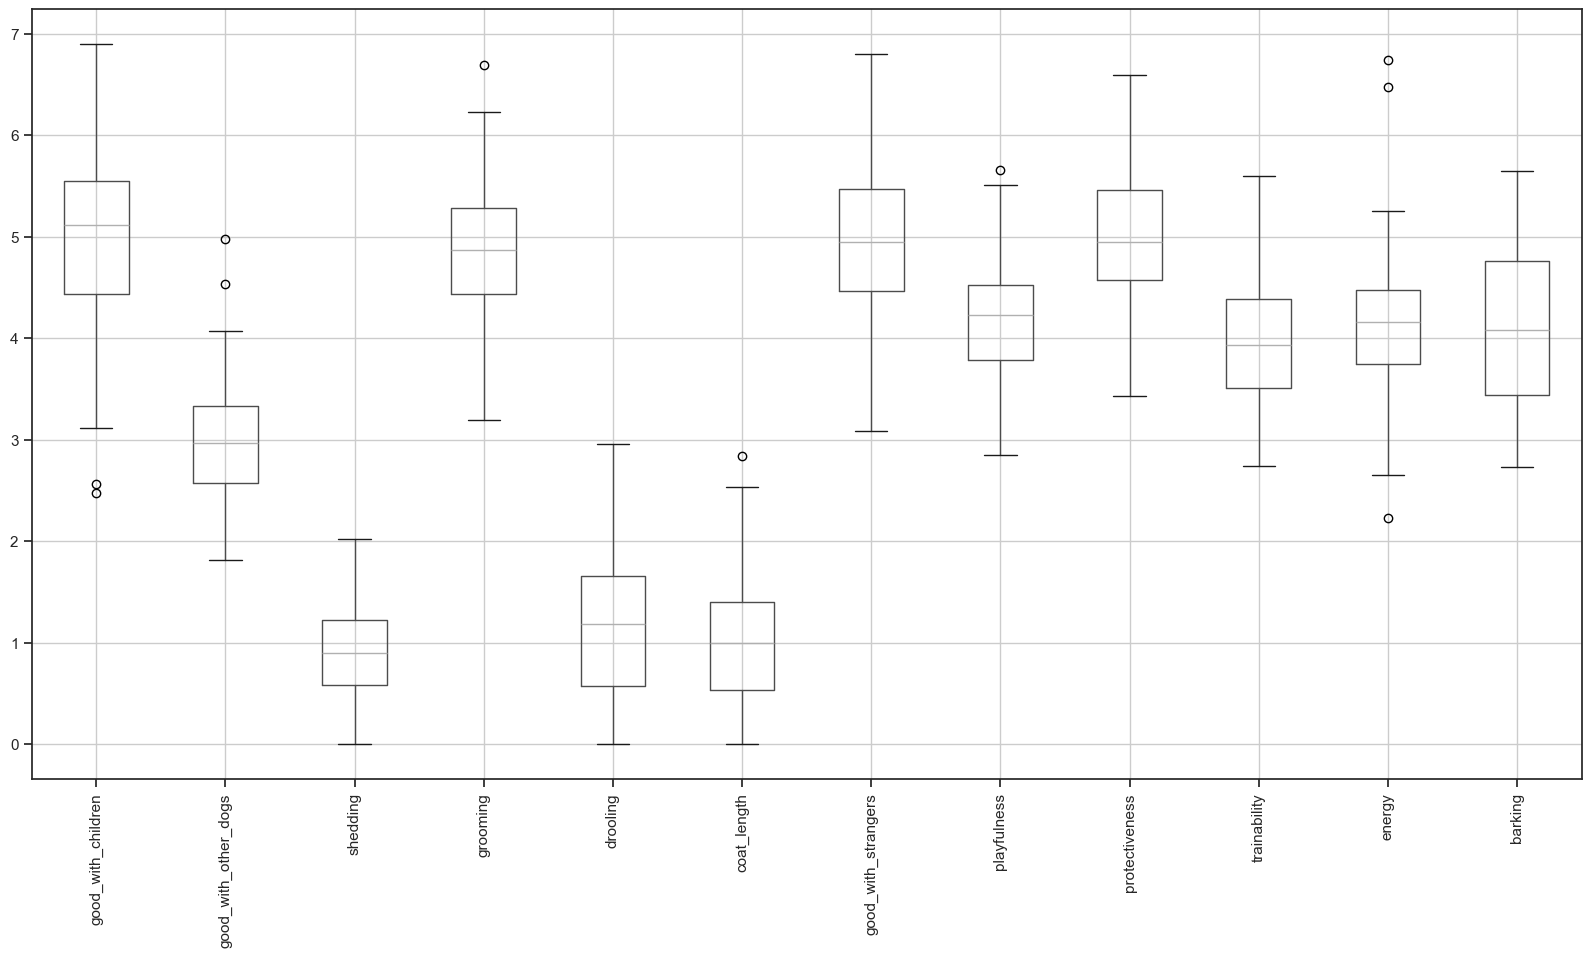

In [106]:
plt.figure(figsize=(20,10))
df[(df['missing_values'] == False) & (df['breed'] == 'Yorkshire Terrier Mix')].boxplot(column=df.loc[:, 'good_with_children':'barking'].columns.tolist())
plt.xticks(rotation = 'vertical')
plt.show()

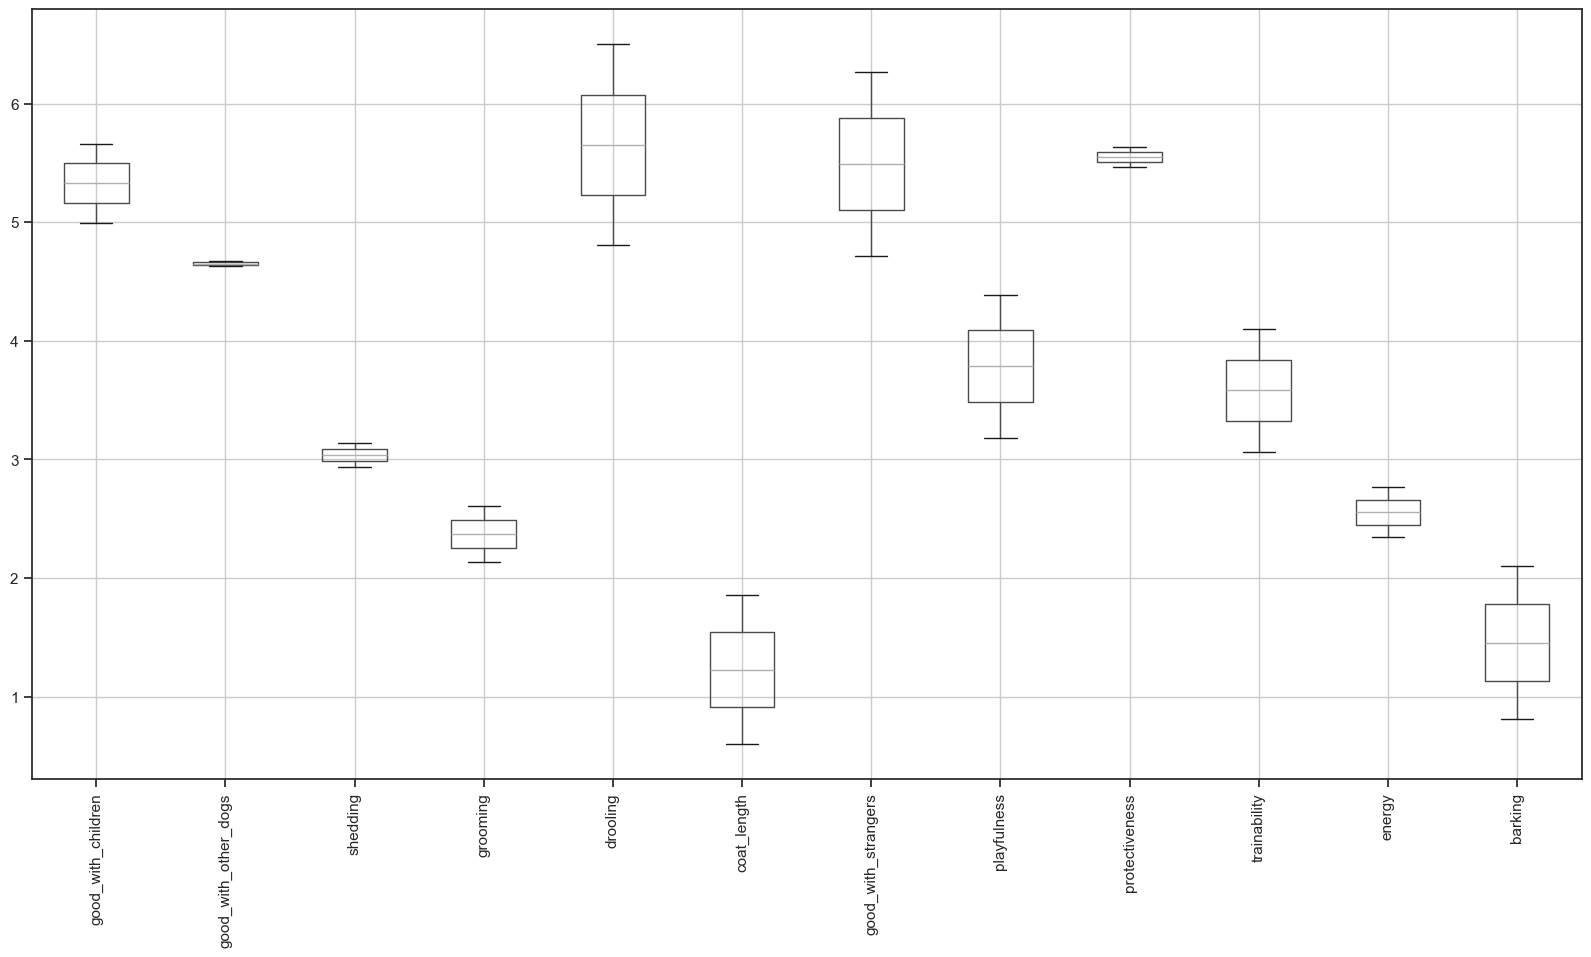

In [107]:
plt.figure(figsize=(20,10))
df[(df['missing_values'] == False) & (df['breed'] == 'Newfoundland Mix')].boxplot(column=df.loc[:, 'good_with_children':'barking'].columns.tolist())
plt.xticks(rotation = 'vertical')
plt.show()

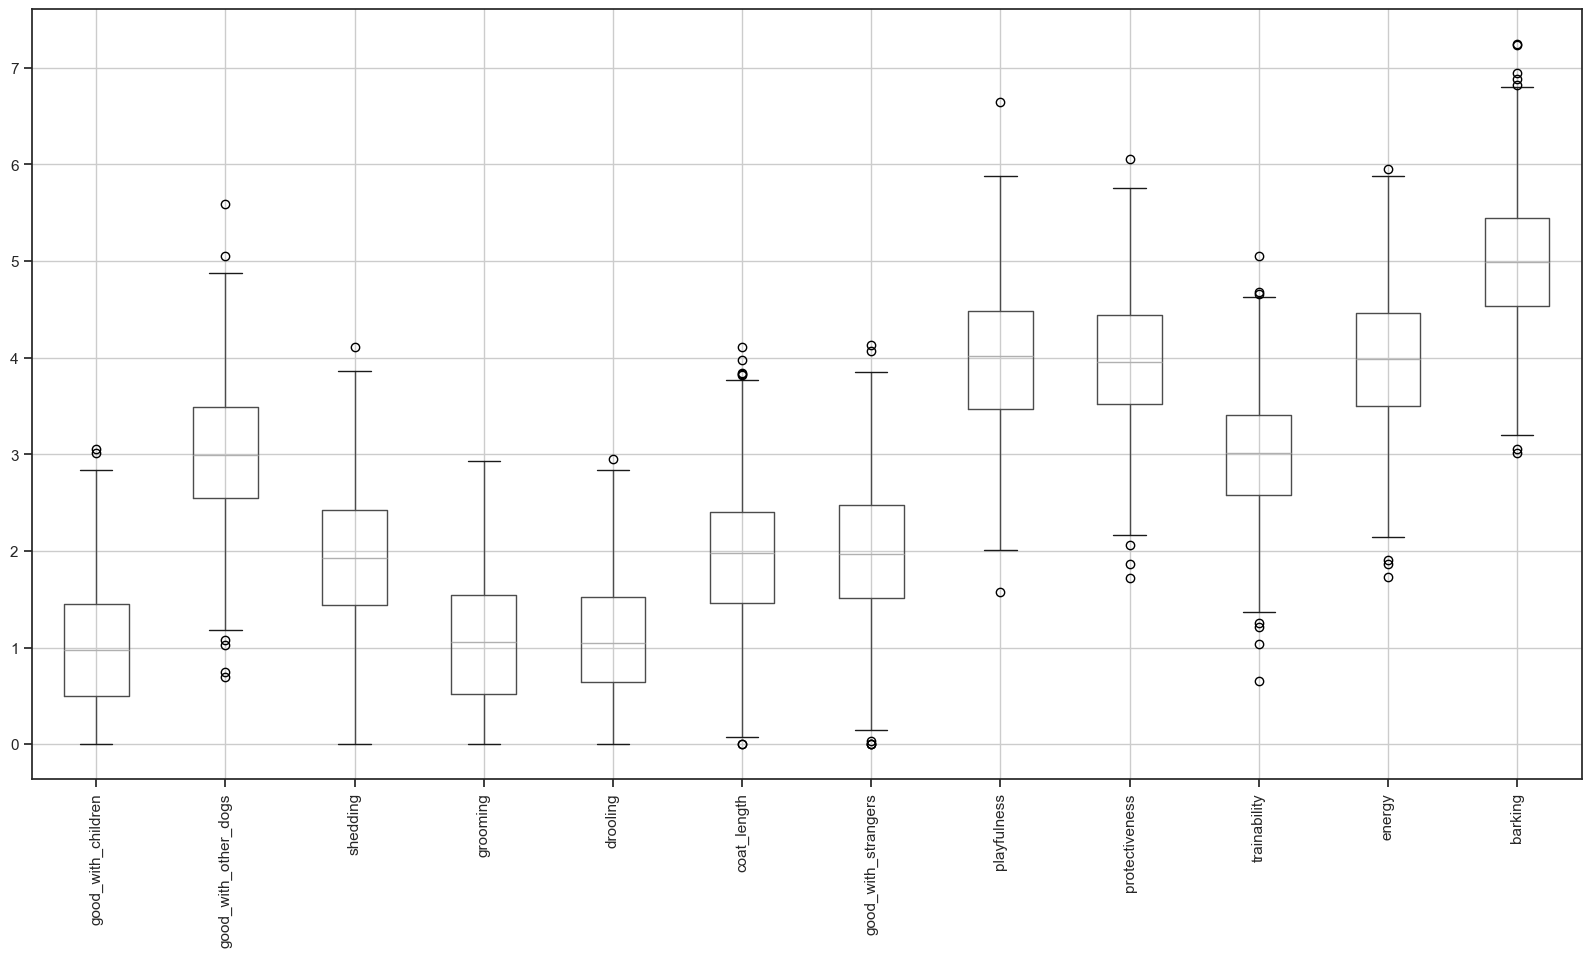

In [108]:
plt.figure(figsize=(20,10))
df[(df['missing_values'] == False) & (df['breed'] == 'Chihuahua Shorthair Mix')].boxplot(column=df.loc[:, 'good_with_children':'barking'].columns.tolist())
plt.xticks(rotation = 'vertical')
plt.show()

As can be seen from the three series of plots above the high range fliers in the boxplots containing all the breeds can be justified by the presence of some breeds that take very high values for the quantities considered.

The same can be done to understand the low range fliers in the attributes from `playfulness` up to `barking`. Let's identify for example the breed with the lowest value of playfulness:

In [109]:
df[df['playfulness'] == df['playfulness'].min()]['breed'].value_counts()

breed
Plott Hound Mix                          23
Miniature Poodle Mix                     13
American Bulldog Mix                     13
Catahoula Mix                            10
Jack Russell Terrier Mix                  9
Chihuahua Longhair Mix                    8
Rat Terrier Mix                           7
Pointer Mix                               6
Cairn Terrier Mix                         5
Staffordshire Mix                         4
Dachshund Longhair Mix                    4
Flat Coat Retriever Mix                   3
Catahoula/Plott Hound                     3
English Bulldog Mix                       2
Blue Lacy Mix                             2
Pharaoh Hound Mix                         2
American Pit Bull Terrier Mix             2
Black Mouth Cur Mix                       2
Alaskan Husky Mix                         2
Border Terrier Mix                        2
Bluetick Hound Mix                        2
Manchester Terrier Mix                    2
Queensland Heeler Mix     

And let's do the boxplots for such breed:

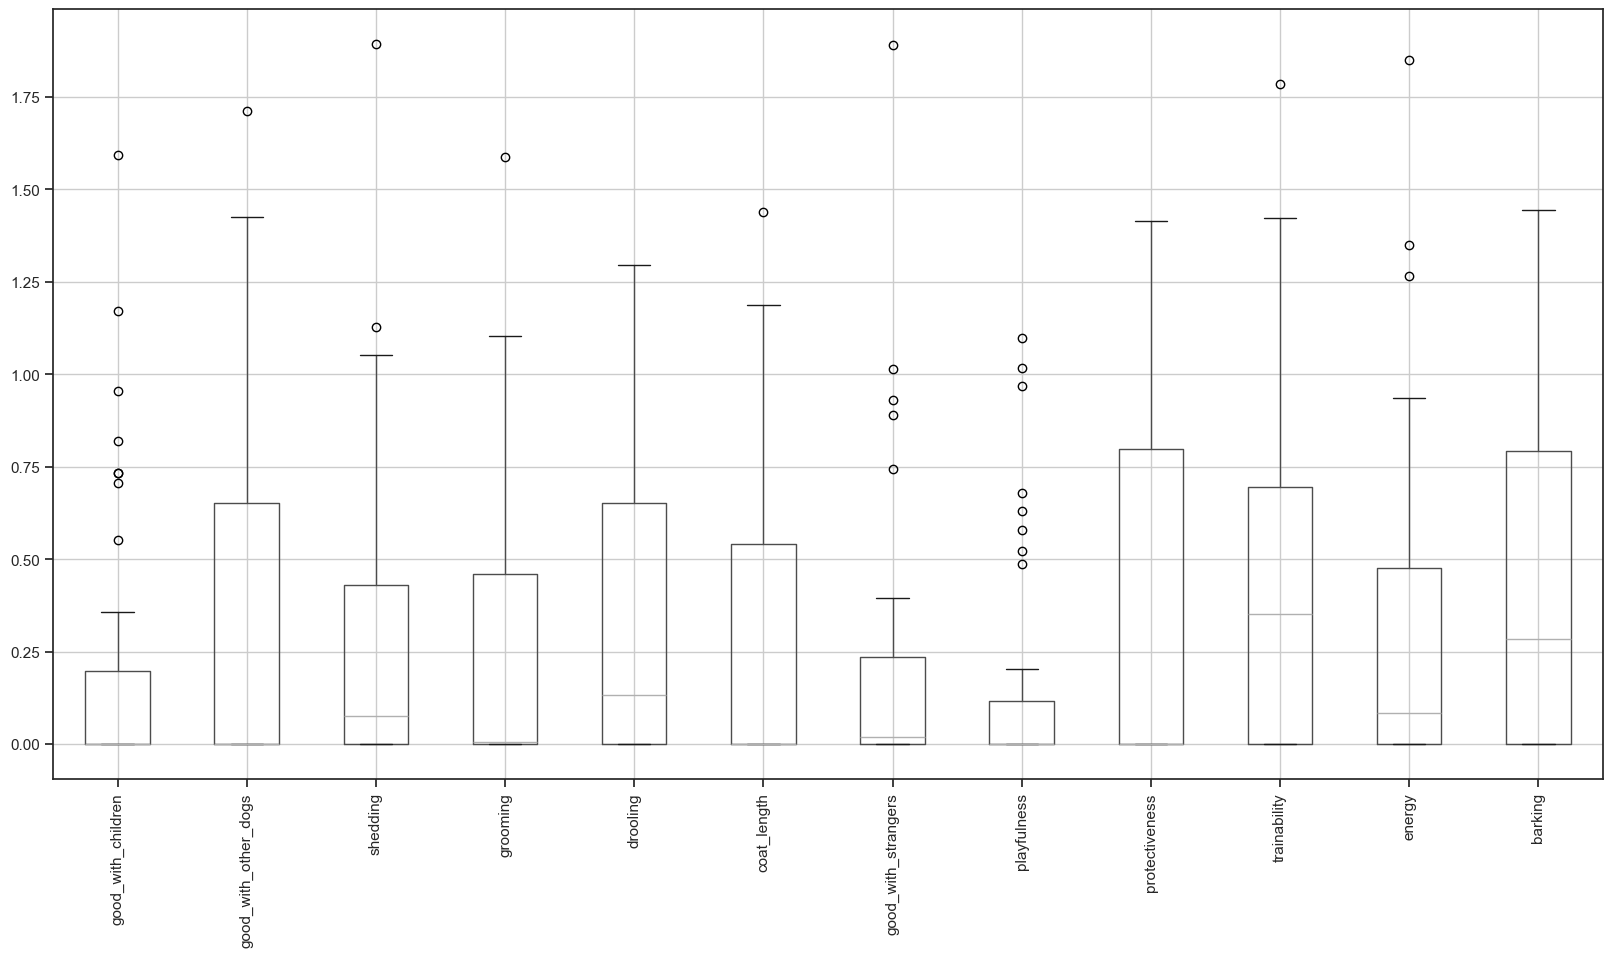

In [110]:
plt.figure(figsize=(20,10))
df[(df['missing_values'] == False) & (df['breed'] == 'Plott Hound Mix')].boxplot(column=df.loc[:, 'good_with_children':'barking'].columns.tolist())
plt.xticks(rotation = 'vertical')
plt.show()

As can be noticed the `Plott Hound Mix` takes very low values in the attribute from `playfulness` up to `energy`, so the presence of low range outliers can be justified with the presence of breeds like this.

To conclude the fliers seen are not real outliers and for the moment they can be kept in the dataset.

The final consideration that we can do about missing values is that the $113$ objects with $0.0$ values in the attributes from `breed_avg_life_expectancy` up to `barking` are useless (since data have not been collected for them) and detrimental for the following analyses, the best thing to do drop such rows:

In [111]:
df[df['missing_values'] == True].index.tolist()

[4003,
 4007,
 4013,
 4021,
 4027,
 4029,
 4035,
 4043,
 4046,
 4049,
 4053,
 4056,
 4057,
 4058,
 4059,
 4063,
 4064,
 4065,
 4069,
 4070,
 4073,
 4075,
 4085,
 4090,
 4091,
 4098,
 4102,
 4113,
 4115,
 4117,
 4120,
 4121,
 4123,
 4124,
 4133,
 4135,
 4138,
 4139,
 4140,
 4143,
 4144,
 4160,
 4161,
 4165,
 4169,
 4175,
 4182,
 4189,
 4192,
 4200,
 4212,
 4216,
 4222,
 4226,
 4228,
 4232,
 4239,
 4253,
 4255,
 4256,
 4257,
 4260,
 4274,
 4277,
 4284,
 4288,
 4295,
 4300,
 4301,
 4305,
 4309,
 4318,
 4329,
 4330,
 4333,
 4342,
 4351,
 4354,
 4356,
 4366,
 4368,
 4377,
 4378,
 4382,
 4384,
 4390,
 4396,
 4398,
 4399,
 4402,
 4406,
 4409,
 4419,
 4423,
 4432,
 4436,
 4437,
 4441,
 4442,
 4447,
 4449,
 4451,
 4461,
 4462,
 4470,
 4473,
 4475,
 4477,
 4478,
 4479,
 4480,
 4482,
 4484]

In [112]:
df = df.drop(df[df['missing_values'] == True].index.tolist(),axis=0)

In [113]:
(df['missing_values'] == False).value_counts()

missing_values
True    4374
Name: count, dtype: int64

After that the column `missing_values` becomes useless and therefore can be dropped:

In [114]:
df = df.drop(columns = 'missing_values')

In [115]:
df.columns

Index(['date_of_birth', 'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'outcome_datetime', 'breed', 'color', 'found_location',
       'intake_condition', 'intake_type', 'sex_upon_intake', 'intake_datetime',
       'breed_avg_life_expectancy', 'breed_avg_height', 'breed_avg_weight',
       'good_with_children', 'good_with_other_dogs', 'shedding', 'grooming',
       'drooling', 'coat_length', 'good_with_strangers', 'playfulness',
       'protectiveness', 'trainability', 'energy', 'barking', 'breed_type',
       'top6_breeds', 'age_upon_intake', 'age_upon_outcome', 'length_of_stay'],
      dtype='object')

Eventually, the attribute `found_location` is useless for the kind of analysis we are going to do in this project so we can drop it:

In [116]:
df = df.drop(columns = 'found_location')

To answer the remaining questions of this section:

1. Should you one-hot encode some variables?

The attributes that in principle can be one-hot encoded are that regarding sex, breed type (e.g. pure, hybrid, mix) and the color. Sex attributes are, for the moment, left unchanged since at this level of analysis we don't know if such transformation can be useful. The same holds for the breed type attribute. For the color attribute instead the transformation is harder to do since there are $180$ different colors and a one hot-encoding would be very expensive in term of dimensionality.

2. Would it be better to check all possible dog colors and create a binary column for each color?
   
Already answered in the previous point. At least for the moment is better to stick with the original column. 

In [117]:
df.to_csv('aac_dogs_01.csv', index=None)